La deserción universitaria es uno de los problemas a los que se enfrentan las instituciones, las causas pueden ser económicas, familiares, afectivas, entre otras. Es importante para las universidades, encontrar los factores que inciten al estudiante a abandonar su proceso académico, para así tomar las decisiones adecuadas y en la medida de lo posible acompañar al estudiantado y prevenir el abandono de los estudios. 
<br> <br>
En este notebook, nos encontramos con un dataset de la Universidad Tecnológica de Pereira, donde encontramos las características de los estudiantes, y quiénes desertaron o no. El dataset comprende datos entre el semestre 2017-1 y 2019-2. Aplicaremos técnicas de limpieza y preprocesamiento de datos, para luego estudiar los datos bajo modelos de Machine learning y tener un acercamiento a las características generales que hacen que un estudiante esté en peligro de deserción.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Para preprocesar los datos, separaremos 100 muestras de cada etiqueta del dataframe para tener un conjunto de test, los datos del dataframe serán desordenados deliberadamente para que la muestra sea aleatoria. 
Se eliminarán las columnas que no aporten a nuestra variable de decisión, luego se normalizarán algunas columnas y en las que se vea necesario, sus valores serán divididos en rangos teniendo en cuenta la distribución de sus datos. 
Este proceso de eliminació, normalización y creación de rangos se efecturá en el dataframe original y el dataframe de test, para que los datos tengan el mismo formato. 
<br> <br> 

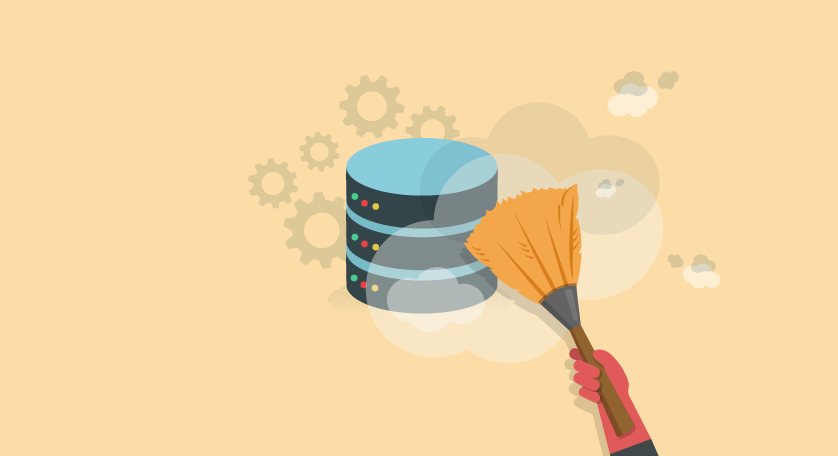

# Preprocesamiento

## preprocesamiento train

In [ ]:
!pip install openpyxl==3.0.0

     |████████████████████████████████| 172 kB 4.7 MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241207 sha256=1a232640288f37219424dc0b7e4dcd112ac529e5fd2a4dd8f3af6ee7dd5f5ee1
  Stored in directory: /root/.cache/pip/wheels/c7/64/ff/ce98f6e1d2701ae8e216c875da62feed2839ac8a3cae0ab8af
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.9
    Uninstalling openpyxl-3.0.9:
      Successfully uninstalled openpyxl-3.0.9


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
df_1=pd.read_excel('/content/drive/MyDrive/Tecno-Inclusion/Desercion_Universitaria/Train.xlsx')  
df_2=pd.read_excel('/content/drive/MyDrive/Tecno-Inclusion/Desercion_Universitaria/Test.xlsx')  

df= pd.concat([df_1, df_2], axis=0)
df

,Periodo,EDAD,SEXO,ESTRATO,NATURALEZA DE COLEGIO,PUNTAJE INSCRIPCIÓN ICFES (No matriculado),VALOR PAGADO,CALIF_ACADEMICA,CALIF_ECONOMICO,CALIF_FAMILIAR,CALIF_PSICOSOCIAL,DEPRESIÓN,ANSIEDAD,PUNTAJETABACO,PUNTAJEALCOHOL,PUNTAJECANNABIS,PUNTAJECOCAINA,PUNTAJEANFETAMINA,PUNTAJEINHALANTE,PUNTAJESEDANTE,PUNTAJEALUCINOGENO,PUNTAJEOPIACEO,PUNTAJEOTRADROGA,estrategia_ACOMODADOR,estrategia_ASIMILADOR,estrategia_CONVERGENTE,estrategia_DIVERGENTE,Etiqueta
0,2018-2,18,0,2,0,237.00,486401.00,-2.4,3.1,-3.2,-4.9,50,39,0,2,0,0,5,0,0,3,0,6,0,1,0,0,1
1,2018-1,19,0,2,0,315.00,654797.61,-3.3,1.4,-4.3,-0.2,79,58,2,6,0,0,0,0,3,5,0,0,1,0,0,0,1
2,2018-2,20,1,3,0,244.00,1944582.00,0.0,0.0,0.0,0.0,33,28,2,10,2,11,0,0,0,2,0,3,0,0,1,0,0
3,2019-1,24,1,1,0,43.25,271560.00,3.1,2.7,2.5,-2.0,36,31,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,2018-1,23,1,2,0,261.00,415039.58,-1.0,1.1,-2.6,-8.6,26,28,4,3,3,0,0,2,4,10,0,3,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,2017-1,22,1,3,0,252.00,1861529.00,2.4,2.4,-3.8,-6.0,35,32,8,5,0,4,3,0,0,3,2,3,0,0,1,0,0
1146,2018-2,21,1,2,1,284.00,1044796.00,5.9,-1.2,-1.4,2.4,0,44,13,19,22,7,0,0,5,0,0,2,0,0,1,0,0
1147,2018-2,16,0,2,0,305.00,486401.00,-4.8,-1.2,-6.2,-4.6,41,29,3,5,12,11,2,2,2,0,0,0,0,0,0,1,1
1148,2018-1,19,1,1,0,311.00,263747.30,-0.5,1.3,0.2,-3.9,48,27,3,6,3,0,0,2,0,0,0,0,0,1,0,0,1


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)
df

,Periodo,EDAD,SEXO,ESTRATO,NATURALEZA DE COLEGIO,PUNTAJE INSCRIPCIÓN ICFES (No matriculado),VALOR PAGADO,CALIF_ACADEMICA,CALIF_ECONOMICO,CALIF_FAMILIAR,CALIF_PSICOSOCIAL,DEPRESIÓN,ANSIEDAD,PUNTAJETABACO,PUNTAJEALCOHOL,PUNTAJECANNABIS,PUNTAJECOCAINA,PUNTAJEANFETAMINA,PUNTAJEINHALANTE,PUNTAJESEDANTE,PUNTAJEALUCINOGENO,PUNTAJEOPIACEO,PUNTAJEOTRADROGA,estrategia_ACOMODADOR,estrategia_ASIMILADOR,estrategia_CONVERGENTE,estrategia_DIVERGENTE,Etiqueta
0,2017-2,19,1,2,0,283.00,0.00,-3.4,1.5,-3.3,-4.2,35,31,0,0,5,0,0,0,0,2,3,0,0,0,1,0,1
1,2019-1,18,1,2,0,256.00,291091.00,1.2,2.4,3.9,3.9,63,41,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,2017-1,20,0,2,0,305.00,422360.00,-0.6,3.5,-0.3,-2.5,0,54,2,2,0,0,0,2,4,2,0,0,1,0,0,0,1
3,2018-2,19,0,1,0,263.00,252029.00,-0.8,0.8,-5.6,-4.8,46,33,3,5,0,0,7,0,3,2,0,2,0,0,0,1,1
4,2018-1,19,0,2,0,288.00,1991835.90,0.5,1.4,-0.6,1.8,53,40,5,5,3,0,0,0,2,6,8,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5745,2017-1,25,1,2,0,250.65,422360.00,0.3,3.5,3.8,-4.2,39,27,0,3,2,0,2,0,5,2,2,2,0,0,1,0,1
5746,2018-1,19,1,2,0,306.00,478588.85,-2.0,4.7,-3.4,-3.3,41,29,3,3,3,0,0,2,0,0,0,0,0,0,1,0,1
5747,2019-1,18,0,2,0,345.00,486401.00,-3.1,-1.2,-5.2,-3.7,35,30,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
5748,2019-1,19,1,2,0,268.00,486401.00,2.9,0.8,4.5,2.9,68,47,3,14,3,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
desertor = df.loc[:,'Etiqueta']== 0
df_desertor=df.loc[desertor]
no_desertor = df.loc[:,'Etiqueta']== 1
df_no_desertor=df.loc[no_desertor]
df_desertor

,Periodo,EDAD,SEXO,ESTRATO,NATURALEZA DE COLEGIO,PUNTAJE INSCRIPCIÓN ICFES (No matriculado),VALOR PAGADO,CALIF_ACADEMICA,CALIF_ECONOMICO,CALIF_FAMILIAR,CALIF_PSICOSOCIAL,DEPRESIÓN,ANSIEDAD,PUNTAJETABACO,PUNTAJEALCOHOL,PUNTAJECANNABIS,PUNTAJECOCAINA,PUNTAJEANFETAMINA,PUNTAJEINHALANTE,PUNTAJESEDANTE,PUNTAJEALUCINOGENO,PUNTAJEOPIACEO,PUNTAJEOTRADROGA,estrategia_ACOMODADOR,estrategia_ASIMILADOR,estrategia_CONVERGENTE,estrategia_DIVERGENTE,Etiqueta
5,2018-2,18,1,1,0,276.0,271560.00,2.8,3.6,-4.3,-1.1,33,27,0,3,2,0,0,0,2,0,0,0,0,0,0,1,0
6,2017-2,19,0,2,0,241.0,1993754.00,0.5,-0.6,-4.6,-1.4,50,40,4,3,0,3,0,0,0,2,7,0,0,0,0,1,0
7,2019-1,19,1,2,1,282.0,916084.00,-1.1,3.5,-2.4,-1.0,41,38,18,26,12,0,3,0,0,0,0,0,0,0,1,0,0
8,2018-2,17,1,1,1,263.0,2109353.00,-3.0,2.1,-2.6,2.3,56,29,6,5,3,0,2,0,0,3,0,0,0,1,0,0,0
10,2018-1,19,0,1,0,255.0,249053.26,1.9,0.2,-3.2,-2.7,36,36,0,6,3,0,0,0,0,5,0,2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2017-2,20,1,2,0,289.0,451925.00,-1.2,-0.5,-2.4,-2.5,36,23,0,2,2,0,0,0,0,2,3,0,1,0,0,0,0
5740,2019-1,19,0,2,0,255.0,486401.00,-0.7,1.0,-5.0,-7.4,38,30,0,5,0,0,0,0,0,0,0,0,0,0,1,0,0
5742,2017-2,22,1,1,0,273.0,0.00,0.5,0.2,-5.6,-6.7,41,28,0,2,9,2,0,0,3,2,0,0,0,1,0,0,0
5743,2017-2,23,1,2,0,285.0,451925.00,1.4,-1.7,-3.9,-3.1,46,29,0,0,3,6,0,2,9,0,0,0,0,0,0,1,0


In [ ]:
df_no_desertor

,Periodo,EDAD,SEXO,ESTRATO,NATURALEZA DE COLEGIO,PUNTAJE INSCRIPCIÓN ICFES (No matriculado),VALOR PAGADO,CALIF_ACADEMICA,CALIF_ECONOMICO,CALIF_FAMILIAR,CALIF_PSICOSOCIAL,DEPRESIÓN,ANSIEDAD,PUNTAJETABACO,PUNTAJEALCOHOL,PUNTAJECANNABIS,PUNTAJECOCAINA,PUNTAJEANFETAMINA,PUNTAJEINHALANTE,PUNTAJESEDANTE,PUNTAJEALUCINOGENO,PUNTAJEOPIACEO,PUNTAJEOTRADROGA,estrategia_ACOMODADOR,estrategia_ASIMILADOR,estrategia_CONVERGENTE,estrategia_DIVERGENTE,Etiqueta
0,2017-2,19,1,2,0,283.00,0.00,-3.4,1.5,-3.3,-4.2,35,31,0,0,5,0,0,0,0,2,3,0,0,0,1,0,1
1,2019-1,18,1,2,0,256.00,291091.00,1.2,2.4,3.9,3.9,63,41,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,2017-1,20,0,2,0,305.00,422360.00,-0.6,3.5,-0.3,-2.5,0,54,2,2,0,0,0,2,4,2,0,0,1,0,0,0,1
3,2018-2,19,0,1,0,263.00,252029.00,-0.8,0.8,-5.6,-4.8,46,33,3,5,0,0,7,0,3,2,0,2,0,0,0,1,1
4,2018-1,19,0,2,0,288.00,1991835.90,0.5,1.4,-0.6,1.8,53,40,5,5,3,0,0,0,2,6,8,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5744,2018-1,19,1,2,0,349.00,478588.85,-1.1,0.9,-5.0,-2.9,30,20,0,5,0,0,0,0,4,0,0,0,0,0,0,1,1
5745,2017-1,25,1,2,0,250.65,422360.00,0.3,3.5,3.8,-4.2,39,27,0,3,2,0,2,0,5,2,2,2,0,0,1,0,1
5746,2018-1,19,1,2,0,306.00,478588.85,-2.0,4.7,-3.4,-3.3,41,29,3,3,3,0,0,2,0,0,0,0,0,0,1,0,1
5747,2019-1,18,0,2,0,345.00,486401.00,-3.1,-1.2,-5.2,-3.7,35,30,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [ ]:
df_desertor_1= df_desertor.iloc[:100,:]
df_desertor_2= df_desertor.iloc[100:,:]
df_no_desertor_1=df_no_desertor.iloc[:100,:]
df_no_desertor_2=df_no_desertor.iloc[100:,:]
len(df_desertor_1), len(df_desertor_2)

(100, 1326)

In [ ]:
len(df_no_desertor_1), len(df_no_desertor_2)

(100, 4224)

In [ ]:
df_test= pd.concat([df_desertor_1, df_no_desertor_1], axis=0)
df_test = df_test.sample(frac=1).reset_index(drop=True)
df_test

,Periodo,EDAD,SEXO,ESTRATO,NATURALEZA DE COLEGIO,PUNTAJE INSCRIPCIÓN ICFES (No matriculado),VALOR PAGADO,CALIF_ACADEMICA,CALIF_ECONOMICO,CALIF_FAMILIAR,CALIF_PSICOSOCIAL,DEPRESIÓN,ANSIEDAD,PUNTAJETABACO,PUNTAJEALCOHOL,PUNTAJECANNABIS,PUNTAJECOCAINA,PUNTAJEANFETAMINA,PUNTAJEINHALANTE,PUNTAJESEDANTE,PUNTAJEALUCINOGENO,PUNTAJEOPIACEO,PUNTAJEOTRADROGA,estrategia_ACOMODADOR,estrategia_ASIMILADOR,estrategia_CONVERGENTE,estrategia_DIVERGENTE,Etiqueta
0,2017-1,20,1,1,0,299.0,0.00,1.5,1.1,-2.7,-2.5,56,47,2,5,8,0,0,0,0,7,0,0,0,0,0,1,0
1,2018-1,19,1,3,0,324.0,1984458.73,-0.4,0.9,-4.4,0.2,49,38,0,5,3,0,0,0,3,0,0,2,0,1,0,0,0
2,2017-1,19,1,3,0,342.0,654798.00,-0.9,-0.2,-3.8,-3.9,44,46,10,10,8,4,0,0,5,0,0,3,0,1,0,0,1
3,2019-1,23,1,3,0,326.0,4547757.00,-1.3,0.3,-5.8,-3.3,40,36,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2018-1,19,1,2,0,288.0,1682955.81,-0.3,3.4,-2.2,-3.7,0,31,14,3,14,0,0,0,0,0,0,14,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2018-2,18,1,3,1,338.0,1236394.00,-0.2,2.7,-4.3,-4.2,39,33,0,5,0,11,2,2,0,0,0,0,0,0,0,1,1
196,2017-2,24,1,2,0,202.5,267496.00,3.8,1.7,-0.9,-0.1,41,35,0,0,0,0,0,2,0,2,0,0,1,0,0,0,0
197,2019-1,18,0,2,0,237.0,2492629.00,1.8,2.4,-3.6,-1.3,46,37,16,17,0,0,0,0,0,0,0,0,0,0,1,0,1
198,2019-1,27,1,3,0,286.0,709055.00,2.1,0.8,-3.9,-0.8,56,47,9,9,9,0,0,0,0,0,0,0,0,0,1,0,1


In [ ]:
df= pd.concat([df_desertor_2, df_no_desertor_2], axis=0)
df = df.sample(frac=1).reset_index(drop=True)
df

,Periodo,EDAD,SEXO,ESTRATO,NATURALEZA DE COLEGIO,PUNTAJE INSCRIPCIÓN ICFES (No matriculado),VALOR PAGADO,CALIF_ACADEMICA,CALIF_ECONOMICO,CALIF_FAMILIAR,CALIF_PSICOSOCIAL,DEPRESIÓN,ANSIEDAD,PUNTAJETABACO,PUNTAJEALCOHOL,PUNTAJECANNABIS,PUNTAJECOCAINA,PUNTAJEANFETAMINA,PUNTAJEINHALANTE,PUNTAJESEDANTE,PUNTAJEALUCINOGENO,PUNTAJEOPIACEO,PUNTAJEOTRADROGA,estrategia_ACOMODADOR,estrategia_ASIMILADOR,estrategia_CONVERGENTE,estrategia_DIVERGENTE,Etiqueta
0,2018-2,18,1,3,1,286.0,1353580.00,-2.4,-3.5,-8.6,-2.9,35,31,0,0,2,11,0,0,0,2,0,3,0,1,0,0,0
1,2018-1,22,0,3,0,279.0,451925.43,-0.2,0.2,-5.1,-1.4,38,36,3,3,2,4,0,0,12,2,0,0,0,0,1,0,1
2,2019-1,18,1,4,0,350.0,923897.00,-3.0,1.3,-3.0,0.6,46,31,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,2019-1,20,0,3,0,262.0,650462.00,1.9,0.3,1.9,2.9,60,47,16,21,0,0,5,0,0,0,0,0,0,0,1,0,1
4,2019-1,19,0,2,0,321.0,906241.00,0.4,2.4,1.4,4.6,53,34,0,5,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5545,2017-1,21,0,3,0,272.0,353415.00,-4.0,3.5,-3.9,-5.9,29,28,0,5,0,0,3,0,0,0,0,0,0,1,0,0,0
5546,2018-2,17,0,2,0,292.0,486401.00,-1.3,0.0,-1.3,1.0,31,31,3,3,12,11,2,2,2,0,0,0,1,0,0,0,1
5547,2018-1,20,1,1,0,351.0,263747.30,-1.1,1.8,-3.5,-6.5,41,26,3,3,0,0,0,2,0,0,0,5,0,0,1,0,1
5548,2019-1,19,1,1,0,298.0,271560.00,-2.9,0.2,2.6,3.2,50,31,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [ ]:
!pip install imblearn

In [ ]:
df.rename(columns={'PUNTAJE INSCRIPCIÓN ICFES (No matriculado)':'PUNTAJE_ICFES'}, inplace=True)

In [ ]:
df= df.drop(['Periodo','estrategia_ACOMODADOR','estrategia_ASIMILADOR','estrategia_CONVERGENTE', 'estrategia_DIVERGENTE', 'PUNTAJETABACO'], axis= 1)

In [ ]:
df.PUNTAJEALUCINOGENO=( df.PUNTAJEALUCINOGENO - df.PUNTAJEALUCINOGENO.min())/ (df.PUNTAJEALUCINOGENO.max() - df.PUNTAJEALUCINOGENO.min())
df.PUNTAJEANFETAMINA=( df.PUNTAJEANFETAMINA - df.PUNTAJEANFETAMINA.min())/ (df.PUNTAJEANFETAMINA.max() - df.PUNTAJEANFETAMINA.min())
df.PUNTAJECANNABIS=( df.PUNTAJECANNABIS - df.PUNTAJECANNABIS.min())/ (df.PUNTAJECANNABIS.max() - df.PUNTAJECANNABIS.min())
df.PUNTAJECOCAINA=( df.PUNTAJECOCAINA - df.PUNTAJECOCAINA.min())/ (df.PUNTAJECOCAINA.max() - df.PUNTAJECOCAINA.min())
df.PUNTAJEINHALANTE=( df.PUNTAJEINHALANTE - df.PUNTAJEINHALANTE.min())/ (df.PUNTAJEINHALANTE.max() - df.PUNTAJEINHALANTE.min())
df.PUNTAJEOPIACEO=( df.PUNTAJEOPIACEO - df.PUNTAJEOPIACEO.min())/ (df.PUNTAJEOPIACEO.max() - df.PUNTAJEOPIACEO.min())
df.PUNTAJEOTRADROGA=( df.PUNTAJEOTRADROGA - df.PUNTAJEOTRADROGA.min())/ (df.PUNTAJEOTRADROGA.max() - df.PUNTAJEOTRADROGA.min())
df.PUNTAJESEDANTE=( df.PUNTAJESEDANTE - df.PUNTAJESEDANTE.min())/ (df.PUNTAJESEDANTE.max() - df.PUNTAJESEDANTE.min())

In [ ]:
df['PUNTAJE_DROGAS']=df.PUNTAJEALUCINOGENO + df.PUNTAJEANFETAMINA +df.PUNTAJECANNABIS + df.PUNTAJECOCAINA +df.PUNTAJEINHALANTE + df.PUNTAJEOPIACEO + df.PUNTAJEOTRADROGA + df.PUNTAJESEDANTE 
df=df.drop(['PUNTAJECANNABIS', 'PUNTAJECOCAINA', 'PUNTAJEANFETAMINA', 'PUNTAJEINHALANTE', 'PUNTAJESEDANTE', 'PUNTAJEALUCINOGENO', 'PUNTAJEOPIACEO', 'PUNTAJEOTRADROGA'   ], axis=1)

In [ ]:
df.DEPRESIÓN=( df.DEPRESIÓN - df.DEPRESIÓN.min())/ (df.DEPRESIÓN.max() - df.DEPRESIÓN.min())
df.ANSIEDAD=( df.ANSIEDAD - df.ANSIEDAD.min())/ (df.ANSIEDAD.max() - df.ANSIEDAD.min())
df['depresion']=df.DEPRESIÓN+df.ANSIEDAD
df=df.drop(['DEPRESIÓN', 'ANSIEDAD'], axis=1)

In [ ]:
df.depresion=( df.depresion - df.depresion.min())/ (df.depresion.max() - df.depresion.min())
df.PUNTAJE_DROGAS=( df.PUNTAJE_DROGAS - df.PUNTAJE_DROGAS.min())/ (df.PUNTAJE_DROGAS.max() - df.PUNTAJE_DROGAS.min())

In [ ]:
df

,EDAD,SEXO,ESTRATO,NATURALEZA DE COLEGIO,PUNTAJE_ICFES,VALOR PAGADO,CALIF_ACADEMICA,CALIF_ECONOMICO,CALIF_FAMILIAR,CALIF_PSICOSOCIAL,PUNTAJEALCOHOL,Etiqueta,PUNTAJE_DROGAS,depresion
0,18,1,3,1,286.0,1353580.00,-2.4,-3.5,-8.6,-2.9,0,0,0.203984,0.454279
1,22,0,3,0,279.0,451925.43,-0.2,0.2,-5.1,-1.4,3,1,0.206698,0.511052
2,18,1,4,0,350.0,923897.00,-3.0,1.3,-3.0,0.6,0,1,0.000000,0.522884
3,20,0,3,0,262.0,650462.00,1.9,0.3,1.9,2.9,21,1,0.061224,0.732000
4,19,0,2,0,321.0,906241.00,0.4,2.4,1.4,4.6,5,1,0.000000,0.589379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5545,21,0,3,0,272.0,353415.00,-4.0,3.5,-3.9,-5.9,5,0,0.036735,0.394020
5546,17,0,2,0,292.0,486401.00,-1.3,0.0,-1.3,1.0,3,1,0.294463,0.429331
5547,20,1,1,0,351.0,263747.30,-1.1,1.8,-3.5,-6.5,3,1,0.097826,0.453637
5548,19,1,1,0,298.0,271560.00,-2.9,0.2,2.6,3.2,0,1,0.000000,0.547831


In [ ]:
import seaborn as sns
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out

def count_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

def box_and_whisker(df_in, col_name):
    title = get_iqr_text(df_in, col_name)
    sns.boxplot(df_in[col_name])
    plt.title(title)
    plt.show()

In [ ]:
df

,EDAD,SEXO,ESTRATO,NATURALEZA DE COLEGIO,PUNTAJE_ICFES,VALOR PAGADO,CALIF_ACADEMICA,CALIF_ECONOMICO,CALIF_FAMILIAR,CALIF_PSICOSOCIAL,PUNTAJEALCOHOL,Etiqueta,PUNTAJE_DROGAS,depresion
0,18,1,3,1,286.0,1353580.00,-2.4,-3.5,-8.6,-2.9,0,0,0.203984,0.454279
1,22,0,3,0,279.0,451925.43,-0.2,0.2,-5.1,-1.4,3,1,0.206698,0.511052
2,18,1,4,0,350.0,923897.00,-3.0,1.3,-3.0,0.6,0,1,0.000000,0.522884
3,20,0,3,0,262.0,650462.00,1.9,0.3,1.9,2.9,21,1,0.061224,0.732000
4,19,0,2,0,321.0,906241.00,0.4,2.4,1.4,4.6,5,1,0.000000,0.589379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5545,21,0,3,0,272.0,353415.00,-4.0,3.5,-3.9,-5.9,5,0,0.036735,0.394020
5546,17,0,2,0,292.0,486401.00,-1.3,0.0,-1.3,1.0,3,1,0.294463,0.429331
5547,20,1,1,0,351.0,263747.30,-1.1,1.8,-3.5,-6.5,3,1,0.097826,0.453637
5548,19,1,1,0,298.0,271560.00,-2.9,0.2,2.6,3.2,0,1,0.000000,0.547831


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


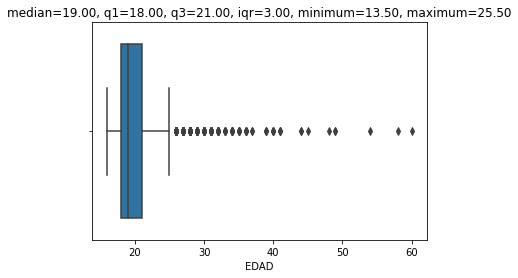

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


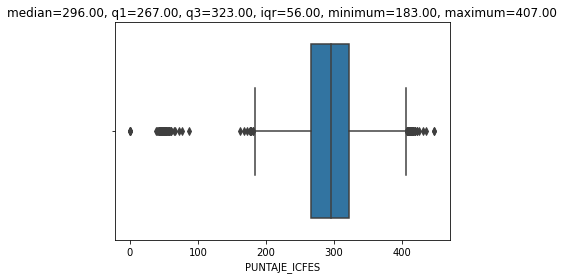

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


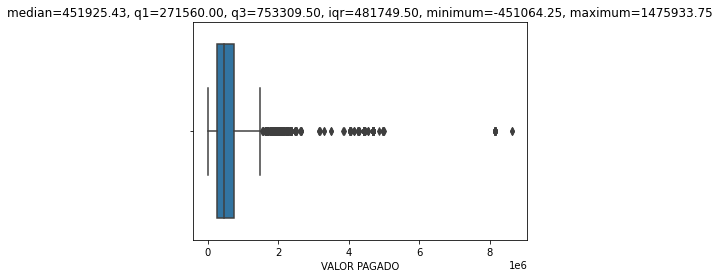

EDAD has 242 outliers
PUNTAJE_ICFES has 117 outliers
VALOR PAGADO has 970 outliers


In [ ]:
# %% Plot the graphs  NATURALEZA DE COLEGIO
box_and_whisker(df, 'EDAD')
box_and_whisker(df, 'PUNTAJE_ICFES')
box_and_whisker(df, 'VALOR PAGADO')
#_, _, _, _, minimum_Col1_before, maximum_Col1_before = get_iqr_values(df, 'Col1')

# %% Count the outliers in the original data frame
print(f"EDAD has {count_outliers(df, 'EDAD')} outliers")
print(f"PUNTAJE_ICFES has {count_outliers(df, 'PUNTAJE_ICFES')} outliers")
print(f"VALOR PAGADO has {count_outliers(df, 'VALOR PAGADO')} outliers")

In [ ]:
df = df.drop(df[df['PUNTAJE_ICFES']==0.0].index)


In [ ]:
icfes= df['PUNTAJE_ICFES']

df.loc[icfes <= 150, 'icfes']=0 #Mal puntaje
df.loc[(icfes > 150) & (icfes <= 300), 'icfes']=1 #Regular
df.loc[(icfes > 300) & (icfes <= 360), 'icfes']=2 # Bueno
df.loc[icfes > 360, 'icfes']=3 # Malo

del df['PUNTAJE_ICFES']
df = pd.concat([df['icfes'],df.drop('icfes',axis=1)], axis=1)

In [ ]:
edad= df['EDAD']

df.loc[edad <= 18, 'edad']=0 #Menor de edad
df.loc[(edad > 18) & (edad <= 22), 'edad']=1 # Joven
df.loc[(edad > 22) & (edad <= 30), 'edad']=2 # Joven Adulto
df.loc[edad > 30, 'edad']=3 # Adulto 

del df['EDAD']
df = pd.concat([df['edad'],df.drop('edad',axis=1)], axis=1)

In [ ]:
a= df[df['VALOR PAGADO'] > 1500000]
a.count()

edad                     969
icfes                    969
SEXO                     969
ESTRATO                  969
NATURALEZA DE COLEGIO    969
VALOR PAGADO             969
CALIF_ACADEMICA          969
CALIF_ECONOMICO          969
CALIF_FAMILIAR           969
CALIF_PSICOSOCIAL        969
PUNTAJEALCOHOL           969
Etiqueta                 969
PUNTAJE_DROGAS           969
depresion                969
dtype: int64

In [ ]:
pagado= df['VALOR PAGADO']

df.loc[pagado <= 200000, 'pagado']=0 # 
df.loc[(pagado > 200000) & (pagado <= 600000), 'pagado']=1 #  
df.loc[(pagado > 600000) & (pagado <= 1500000), 'pagado']=2 #  
df.loc[pagado > 1500000, 'pagado']=3 #  

del df['VALOR PAGADO']
df = pd.concat([df['pagado'],df.drop('pagado',axis=1)], axis=1)

In [ ]:
df.CALIF_ACADEMICA=( df.CALIF_ACADEMICA - df.CALIF_ACADEMICA.min())/ (df.CALIF_ACADEMICA.max() - df.CALIF_ACADEMICA.min())
df.CALIF_ECONOMICO=( df.CALIF_ECONOMICO - df.CALIF_ECONOMICO.min())/ (df.CALIF_ECONOMICO.max() - df.CALIF_ECONOMICO.min())
df.CALIF_FAMILIAR=( df.CALIF_FAMILIAR - df.CALIF_FAMILIAR.min())/ (df.CALIF_FAMILIAR.max() - df.CALIF_FAMILIAR.min())
df.CALIF_PSICOSOCIAL=( df.CALIF_PSICOSOCIAL - df.CALIF_PSICOSOCIAL.min())/ (df.CALIF_PSICOSOCIAL.max() - df.CALIF_PSICOSOCIAL.min())

In [ ]:
academica= df['CALIF_ACADEMICA']

df.loc[academica <= 0.25, 'academica']=0
df.loc[(academica > 0.25) & (academica <= 0.5), 'academica']=1
df.loc[(academica > 0.5) & (academica <= 0.75), 'academica']=2
df.loc[academica > 0.75, 'academica']=3

del df['CALIF_ACADEMICA']
df = pd.concat([df['academica'],df.drop('academica',axis=1)], axis=1)

In [ ]:
economica= df['CALIF_ECONOMICO']

df.loc[economica <= 0.25, 'economica']=0
df.loc[(economica > 0.25) & (economica <= 0.5), 'economica']=1
df.loc[(economica > 0.5) & (economica <= 0.75), 'economica']=2
df.loc[economica > 0.75, 'economica']=3

del df['CALIF_ECONOMICO']
df = pd.concat([df['economica'],df.drop('economica',axis=1)], axis=1)

In [ ]:
familiar= df['CALIF_FAMILIAR']

df.loc[familiar <= 0.25, 'familiar']=0
df.loc[(familiar > 0.25) & (familiar <= 0.5), 'familiar']=1
df.loc[(familiar > 0.5) & (familiar <= 0.75), 'familiar']=2
df.loc[familiar > 0.75, 'familiar']=3

del df['CALIF_FAMILIAR']
df = pd.concat([df['familiar'],df.drop('familiar',axis=1)], axis=1)

In [ ]:
psicosocial= df['CALIF_PSICOSOCIAL']

df.loc[psicosocial <= 0.25, 'psicosocial']=0
df.loc[(psicosocial > 0.25) & (psicosocial <= 0.5), 'psicosocial']=1
df.loc[(psicosocial > 0.5) & (psicosocial <= 0.75), 'psicosocial']=2
df.loc[psicosocial > 0.75, 'psicosocial']=3

del df['CALIF_PSICOSOCIAL']
df = pd.concat([df['psicosocial'],df.drop('psicosocial',axis=1)], axis=1)

In [ ]:
df.PUNTAJE_DROGAS=( df.PUNTAJE_DROGAS - df.PUNTAJE_DROGAS.min())/ (df.PUNTAJE_DROGAS.max() - df.PUNTAJE_DROGAS.min())
df.PUNTAJE_DROGAS.describe()

count    5545.000000
mean        0.132613
std         0.120678
min         0.000000
25%         0.019295
50%         0.115770
75%         0.203984
max         1.000000
Name: PUNTAJE_DROGAS, dtype: float64

In [ ]:
drogas= df['PUNTAJE_DROGAS']

df.loc[drogas <= 0.15, 'drogas']=0 # no 
df.loc[(drogas > 0.15) , 'drogas']=1 #sí 
del df['PUNTAJE_DROGAS']
df = pd.concat([df['drogas'],df.drop('drogas',axis=1)], axis=1)

In [ ]:
df.PUNTAJEALCOHOL=( df.PUNTAJEALCOHOL - df.PUNTAJEALCOHOL.min())/ (df.PUNTAJEALCOHOL.max() - df.PUNTAJEALCOHOL.min())
df.PUNTAJEALCOHOL.describe()

count    5545.000000
mean        0.163631
std         0.135201
min         0.000000
25%         0.083333
50%         0.138889
75%         0.194444
max         1.000000
Name: PUNTAJEALCOHOL, dtype: float64

In [ ]:
alcohol= df['PUNTAJEALCOHOL']

df.loc[alcohol <= 0.15, 'alcohol']=0 # no 
df.loc[(alcohol > 0.15) , 'alcohol']=1 #sí 
del df['PUNTAJEALCOHOL']
df = pd.concat([df['alcohol'],df.drop('alcohol',axis=1)], axis=1)


In [ ]:
df.depresion=( df.depresion - df.depresion.min())/ (df.depresion.max() - df.depresion.min())
df.depresion.describe()

count    5545.000000
mean        0.533407
std         0.118327
min         0.000000
25%         0.463267
50%         0.523526
75%         0.602495
max         1.000000
Name: depresion, dtype: float64

In [ ]:
DEPRE= df['depresion']

df.loc[DEPRE <= 0.4, 'DEPRE']=0 # no 
df.loc[(DEPRE > 0.4) &(DEPRE < 0.6), 'DEPRE']=1 #sí 
df.loc[(DEPRE > 0.6),  'DEPRE']=2 #SIIII
del df['depresion']
df = pd.concat([df['DEPRE'],df.drop('DEPRE',axis=1)], axis=1)


In [ ]:
df

,DEPRE,alcohol,drogas,psicosocial,familiar,economica,academica,pagado,edad,icfes,SEXO,ESTRATO,NATURALEZA DE COLEGIO,Etiqueta
0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,1,3,1,0
1,1.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,0,3,0,1
2,1.0,0.0,0.0,2.0,1.0,2.0,1.0,2.0,0.0,2.0,1,4,0,1
3,2.0,1.0,0.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0,3,0,1
4,1.0,0.0,0.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5545,0.0,0.0,0.0,1.0,1.0,3.0,0.0,1.0,1.0,1.0,0,3,0,0
5546,1.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0,2,0,1
5547,1.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1,1,0,1
5548,1.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1,1,0,1


In [ ]:
#df=df.reset_index(drop=True)

In [ ]:
df

,DEPRE,alcohol,drogas,psicosocial,familiar,economica,academica,pagado,edad,icfes,SEXO,ESTRATO,NATURALEZA DE COLEGIO,Etiqueta
0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,1,3,1,0
1,1.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,0,3,0,1
2,1.0,0.0,0.0,2.0,1.0,2.0,1.0,2.0,0.0,2.0,1,4,0,1
3,2.0,1.0,0.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0,3,0,1
4,1.0,0.0,0.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5545,0.0,0.0,0.0,1.0,1.0,3.0,0.0,1.0,1.0,1.0,0,3,0,0
5546,1.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0,2,0,1
5547,1.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1,1,0,1
5548,1.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1,1,0,1


## preprocesamiento test

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

#df_test=pd.read_excel('/content/drive/MyDrive/Tecno-Inclusion/Desercion_Universitaria/Test.xlsx')  

df_test

,Periodo,EDAD,SEXO,ESTRATO,NATURALEZA DE COLEGIO,PUNTAJE INSCRIPCIÓN ICFES (No matriculado),VALOR PAGADO,CALIF_ACADEMICA,CALIF_ECONOMICO,CALIF_FAMILIAR,CALIF_PSICOSOCIAL,DEPRESIÓN,ANSIEDAD,PUNTAJETABACO,PUNTAJEALCOHOL,PUNTAJECANNABIS,PUNTAJECOCAINA,PUNTAJEANFETAMINA,PUNTAJEINHALANTE,PUNTAJESEDANTE,PUNTAJEALUCINOGENO,PUNTAJEOPIACEO,PUNTAJEOTRADROGA,estrategia_ACOMODADOR,estrategia_ASIMILADOR,estrategia_CONVERGENTE,estrategia_DIVERGENTE,Etiqueta
0,2017-1,20,1,1,0,299.0,0.00,1.5,1.1,-2.7,-2.5,56,47,2,5,8,0,0,0,0,7,0,0,0,0,0,1,0
1,2018-1,19,1,3,0,324.0,1984458.73,-0.4,0.9,-4.4,0.2,49,38,0,5,3,0,0,0,3,0,0,2,0,1,0,0,0
2,2017-1,19,1,3,0,342.0,654798.00,-0.9,-0.2,-3.8,-3.9,44,46,10,10,8,4,0,0,5,0,0,3,0,1,0,0,1
3,2019-1,23,1,3,0,326.0,4547757.00,-1.3,0.3,-5.8,-3.3,40,36,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2018-1,19,1,2,0,288.0,1682955.81,-0.3,3.4,-2.2,-3.7,0,31,14,3,14,0,0,0,0,0,0,14,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2018-2,18,1,3,1,338.0,1236394.00,-0.2,2.7,-4.3,-4.2,39,33,0,5,0,11,2,2,0,0,0,0,0,0,0,1,1
196,2017-2,24,1,2,0,202.5,267496.00,3.8,1.7,-0.9,-0.1,41,35,0,0,0,0,0,2,0,2,0,0,1,0,0,0,0
197,2019-1,18,0,2,0,237.0,2492629.00,1.8,2.4,-3.6,-1.3,46,37,16,17,0,0,0,0,0,0,0,0,0,0,1,0,1
198,2019-1,27,1,3,0,286.0,709055.00,2.1,0.8,-3.9,-0.8,56,47,9,9,9,0,0,0,0,0,0,0,0,0,1,0,1


In [ ]:
df_test.rename(columns={'PUNTAJE INSCRIPCIÓN ICFES (No matriculado)':'PUNTAJE_ICFES'}, inplace=True)

In [ ]:
df_test= df_test.drop(['Periodo','estrategia_ACOMODADOR','estrategia_ASIMILADOR','estrategia_CONVERGENTE', 'estrategia_DIVERGENTE', 'PUNTAJETABACO'], axis= 1)

In [ ]:
df_test.PUNTAJEALUCINOGENO=( df_test.PUNTAJEALUCINOGENO - df_test.PUNTAJEALUCINOGENO.min())/ (df_test.PUNTAJEALUCINOGENO.max() - df_test.PUNTAJEALUCINOGENO.min())
df_test.PUNTAJEANFETAMINA=( df_test.PUNTAJEANFETAMINA - df_test.PUNTAJEANFETAMINA.min())/ (df_test.PUNTAJEANFETAMINA.max() - df_test.PUNTAJEANFETAMINA.min())
df_test.PUNTAJECANNABIS=( df_test.PUNTAJECANNABIS - df_test.PUNTAJECANNABIS.min())/ (df_test.PUNTAJECANNABIS.max() - df_test.PUNTAJECANNABIS.min())
df_test.PUNTAJECOCAINA=( df_test.PUNTAJECOCAINA - df_test.PUNTAJECOCAINA.min())/ (df_test.PUNTAJECOCAINA.max() - df_test.PUNTAJECOCAINA.min())
df_test.PUNTAJEINHALANTE=( df_test.PUNTAJEINHALANTE - df_test.PUNTAJEINHALANTE.min())/ (df_test.PUNTAJEINHALANTE.max() - df_test.PUNTAJEINHALANTE.min())
df_test.PUNTAJEOPIACEO=( df_test.PUNTAJEOPIACEO - df_test.PUNTAJEOPIACEO.min())/ (df_test.PUNTAJEOPIACEO.max() - df_test.PUNTAJEOPIACEO.min())
df_test.PUNTAJEOTRADROGA=( df_test.PUNTAJEOTRADROGA - df_test.PUNTAJEOTRADROGA.min())/ (df_test.PUNTAJEOTRADROGA.max() - df_test.PUNTAJEOTRADROGA.min())
df_test.PUNTAJESEDANTE=( df_test.PUNTAJESEDANTE - df_test.PUNTAJESEDANTE.min())/ (df_test.PUNTAJESEDANTE.max() - df_test.PUNTAJESEDANTE.min())

In [ ]:
df_test['PUNTAJE_DROGAS']=df_test.PUNTAJEALUCINOGENO + df_test.PUNTAJEANFETAMINA +df_test.PUNTAJECANNABIS + df_test.PUNTAJECOCAINA +df_test.PUNTAJEINHALANTE + df_test.PUNTAJEOPIACEO + df_test.PUNTAJEOTRADROGA + df_test.PUNTAJESEDANTE 
df_test=df_test.drop(['PUNTAJECANNABIS', 'PUNTAJECOCAINA', 'PUNTAJEANFETAMINA', 'PUNTAJEINHALANTE', 'PUNTAJESEDANTE', 'PUNTAJEALUCINOGENO', 'PUNTAJEOPIACEO', 'PUNTAJEOTRADROGA'   ], axis=1)

In [ ]:
df_test.DEPRESIÓN=( df_test.DEPRESIÓN - df_test.DEPRESIÓN.min())/ (df_test.DEPRESIÓN.max() - df_test.DEPRESIÓN.min())
df_test.ANSIEDAD=( df_test.ANSIEDAD - df_test.ANSIEDAD.min())/ (df_test.ANSIEDAD.max() - df_test.ANSIEDAD.min())
df_test['depresion']=df_test.DEPRESIÓN+df_test.ANSIEDAD
df_test=df_test.drop(['DEPRESIÓN', 'ANSIEDAD'], axis=1)

In [ ]:
df_test.depresion=( df_test.depresion - df_test.depresion.min())/ (df_test.depresion.max() - df_test.depresion.min())
df_test.PUNTAJE_DROGAS=( df_test.PUNTAJE_DROGAS - df_test.PUNTAJE_DROGAS.min())/ (df_test.PUNTAJE_DROGAS.max() - df_test.PUNTAJE_DROGAS.min())

In [ ]:
df_test

,EDAD,SEXO,ESTRATO,NATURALEZA DE COLEGIO,PUNTAJE_ICFES,VALOR PAGADO,CALIF_ACADEMICA,CALIF_ECONOMICO,CALIF_FAMILIAR,CALIF_PSICOSOCIAL,PUNTAJEALCOHOL,Etiqueta,PUNTAJE_DROGAS,depresion
0,20,1,1,0,299.0,0.00,1.5,1.1,-2.7,-2.5,5,0,0.220529,0.588907
1,19,1,3,0,324.0,1984458.73,-0.4,0.9,-4.4,0.2,5,0,0.090009,0.443283
2,19,1,3,0,342.0,654798.00,-0.9,-0.2,-3.8,-3.9,10,1,0.239402,0.496098
3,23,1,3,0,326.0,4547757.00,-1.3,0.3,-5.8,-3.3,0,0,0.000000,0.360089
4,19,1,2,0,288.0,1682955.81,-0.3,3.4,-2.2,-3.7,3,0,0.358014,0.032609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,18,1,3,1,338.0,1236394.00,-0.2,2.7,-4.3,-4.2,5,1,0.239885,0.320652
196,24,1,2,0,202.5,267496.00,3.8,1.7,-0.9,-0.1,0,0,0.083150,0.356048
197,18,0,2,0,237.0,2492629.00,1.8,2.4,-3.6,-1.3,17,1,0.000000,0.411929
198,27,1,3,0,286.0,709055.00,2.1,0.8,-3.9,-0.8,9,1,0.105745,0.588907


In [ ]:
df_test = df_test.drop(df_test[df_test['PUNTAJE_ICFES']==0.0].index)


In [ ]:
icfes= df_test['PUNTAJE_ICFES']

df_test.loc[icfes <= 150, 'icfes']=0 #Mal puntaje
df_test.loc[(icfes > 150) & (icfes <= 300), 'icfes']=1 #Regular
df_test.loc[(icfes > 300) & (icfes <= 360), 'icfes']=2 # Bueno
df_test.loc[icfes > 360, 'icfes']=3 # Malo

del df_test['PUNTAJE_ICFES']
df_test = pd.concat([df_test['icfes'],df_test.drop('icfes',axis=1)], axis=1)

In [ ]:
edad= df_test['EDAD']

df_test.loc[edad <= 18, 'edad']=0 #Menor de edad
df_test.loc[(edad > 18) & (edad <= 22), 'edad']=1 # Joven
df_test.loc[(edad > 22) & (edad <= 30), 'edad']=2 # Joven Adulto
df_test.loc[edad > 30, 'edad']=3 # Adulto 

del df_test['EDAD']
df_test = pd.concat([df_test['edad'],df_test.drop('edad',axis=1)], axis=1)

In [ ]:
a= df_test[df_test['VALOR PAGADO'] > 1500000]
a.count()

edad                     48
icfes                    48
SEXO                     48
ESTRATO                  48
NATURALEZA DE COLEGIO    48
VALOR PAGADO             48
CALIF_ACADEMICA          48
CALIF_ECONOMICO          48
CALIF_FAMILIAR           48
CALIF_PSICOSOCIAL        48
PUNTAJEALCOHOL           48
Etiqueta                 48
PUNTAJE_DROGAS           48
depresion                48
dtype: int64

In [ ]:
pagado= df_test['VALOR PAGADO']

df_test.loc[pagado <= 200000, 'pagado']=0 # 
df_test.loc[(pagado > 200000) & (pagado <= 600000), 'pagado']=1 #  
df_test.loc[(pagado > 600000) & (pagado <= 1500000), 'pagado']=2 #  
df_test.loc[pagado > 1500000, 'pagado']=3 #  

del df_test['VALOR PAGADO']
df_test = pd.concat([df_test['pagado'],df_test.drop('pagado',axis=1)], axis=1)

In [ ]:
df_test.CALIF_ACADEMICA=( df_test.CALIF_ACADEMICA - df_test.CALIF_ACADEMICA.min())/ (df_test.CALIF_ACADEMICA.max() - df_test.CALIF_ACADEMICA.min())
df_test.CALIF_ECONOMICO=( df_test.CALIF_ECONOMICO - df_test.CALIF_ECONOMICO.min())/ (df_test.CALIF_ECONOMICO.max() - df_test.CALIF_ECONOMICO.min())
df_test.CALIF_FAMILIAR=( df_test.CALIF_FAMILIAR - df_test.CALIF_FAMILIAR.min())/ (df_test.CALIF_FAMILIAR.max() - df_test.CALIF_FAMILIAR.min())
df_test.CALIF_PSICOSOCIAL=( df_test.CALIF_PSICOSOCIAL - df_test.CALIF_PSICOSOCIAL.min())/ (df_test.CALIF_PSICOSOCIAL.max() - df_test.CALIF_PSICOSOCIAL.min())

In [ ]:
academica= df_test['CALIF_ACADEMICA']

df_test.loc[academica <= 0.25, 'academica']=0
df_test.loc[(academica > 0.25) & (academica <= 0.5), 'academica']=1
df_test.loc[(academica > 0.5) & (academica <= 0.75), 'academica']=2
df_test.loc[academica > 0.75, 'academica']=3

del df_test['CALIF_ACADEMICA']
df_test = pd.concat([df_test['academica'],df_test.drop('academica',axis=1)], axis=1)

In [ ]:
economica= df_test['CALIF_ECONOMICO']

df_test.loc[economica <= 0.25, 'economica']=0
df_test.loc[(economica > 0.25) & (economica <= 0.5), 'economica']=1
df_test.loc[(economica > 0.5) & (economica <= 0.75), 'economica']=2
df_test.loc[economica > 0.75, 'economica']=3

del df_test['CALIF_ECONOMICO']
df_test = pd.concat([df_test['economica'],df_test.drop('economica',axis=1)], axis=1)

In [ ]:
familiar= df_test['CALIF_FAMILIAR']

df_test.loc[familiar <= 0.25, 'familiar']=0
df_test.loc[(familiar > 0.25) & (familiar <= 0.5), 'familiar']=1
df_test.loc[(familiar > 0.5) & (familiar <= 0.75), 'familiar']=2
df_test.loc[familiar > 0.75, 'familiar']=3

del df_test['CALIF_FAMILIAR']
df_test = pd.concat([df_test['familiar'],df_test.drop('familiar',axis=1)], axis=1)

In [ ]:
psicosocial= df_test['CALIF_PSICOSOCIAL']

df_test.loc[psicosocial <= 0.25, 'psicosocial']=0
df_test.loc[(psicosocial > 0.25) & (psicosocial <= 0.5), 'psicosocial']=1
df_test.loc[(psicosocial > 0.5) & (psicosocial <= 0.75), 'psicosocial']=2
df_test.loc[psicosocial > 0.75, 'psicosocial']=3

del df_test['CALIF_PSICOSOCIAL']
df_test = pd.concat([df_test['psicosocial'],df_test.drop('psicosocial',axis=1)], axis=1)

In [ ]:
df_test.PUNTAJE_DROGAS=( df_test.PUNTAJE_DROGAS - df_test.PUNTAJE_DROGAS.min())/ (df_test.PUNTAJE_DROGAS.max() - df_test.PUNTAJE_DROGAS.min())
df_test.PUNTAJE_DROGAS.describe()

count    200.000000
mean       0.180560
std        0.159011
min        0.000000
25%        0.058747
50%        0.161917
75%        0.256174
max        1.000000
Name: PUNTAJE_DROGAS, dtype: float64

In [ ]:
drogas= df_test['PUNTAJE_DROGAS']

df_test.loc[drogas <= 0.15, 'drogas']=0 # no 
df_test.loc[(drogas > 0.15) , 'drogas']=1 #sí 
del df_test['PUNTAJE_DROGAS']
df_test = pd.concat([df_test['drogas'],df_test.drop('drogas',axis=1)], axis=1)

In [ ]:
df_test.PUNTAJEALCOHOL=( df_test.PUNTAJEALCOHOL - df_test.PUNTAJEALCOHOL.min())/ (df_test.PUNTAJEALCOHOL.max() - df_test.PUNTAJEALCOHOL.min())
df_test.PUNTAJEALCOHOL.describe()

count    200.000000
mean       0.205469
std        0.180959
min        0.000000
25%        0.093750
50%        0.156250
75%        0.250000
max        1.000000
Name: PUNTAJEALCOHOL, dtype: float64

In [ ]:
alcohol= df_test['PUNTAJEALCOHOL']

df_test.loc[alcohol <= 0.15, 'alcohol']=0 # no 
df_test.loc[(alcohol > 0.15) , 'alcohol']=1 #sí 
del df_test['PUNTAJEALCOHOL']
df_test = pd.concat([df_test['alcohol'],df_test.drop('alcohol',axis=1)], axis=1)


In [ ]:
df_test.depresion=( df_test.depresion - df_test.depresion.min())/ (df_test.depresion.max() - df_test.depresion.min())
df_test.depresion.describe()

count    200.000000
mean       0.373524
std        0.147348
min        0.000000
25%        0.277174
50%        0.360089
75%        0.462688
max        1.000000
Name: depresion, dtype: float64

In [ ]:
DEPRE= df_test['depresion']

df_test.loc[DEPRE <= 0.4, 'DEPRE']=0 # no 
df_test.loc[(DEPRE > 0.4) &(DEPRE < 0.6), 'DEPRE']=1 #sí 
df_test.loc[(DEPRE > 0.6),  'DEPRE']=2 #SIIII
del df_test['depresion']
df_test = pd.concat([df_test['DEPRE'],df_test.drop('DEPRE',axis=1)], axis=1)


In [ ]:
df

,DEPRE,alcohol,drogas,psicosocial,familiar,economica,academica,pagado,edad,icfes,SEXO,ESTRATO,NATURALEZA DE COLEGIO,Etiqueta
0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,1,3,1,0
1,1.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,0,3,0,1
2,1.0,0.0,0.0,2.0,1.0,2.0,1.0,2.0,0.0,2.0,1,4,0,1
3,2.0,1.0,0.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0,3,0,1
4,1.0,0.0,0.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5545,0.0,0.0,0.0,1.0,1.0,3.0,0.0,1.0,1.0,1.0,0,3,0,0
5546,1.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0,2,0,1
5547,1.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1,1,0,1
5548,1.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1,1,0,1


In [ ]:
#df=df.reset_index(drop=True)

In [ ]:
df_test

,DEPRE,alcohol,drogas,psicosocial,familiar,economica,academica,pagado,edad,icfes,SEXO,ESTRATO,NATURALEZA DE COLEGIO,Etiqueta
0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,0.0,1.0,1.0,1,1,0,0
1,1.0,1.0,0.0,2.0,0.0,2.0,2.0,3.0,1.0,2.0,1,3,0,0
2,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1,3,0,1
3,0.0,0.0,0.0,1.0,0.0,2.0,1.0,3.0,2.0,2.0,1,3,0,0
4,0.0,0.0,1.0,1.0,1.0,3.0,2.0,3.0,1.0,1.0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,1.0,1.0,1.0,0.0,3.0,2.0,2.0,0.0,2.0,1,3,1,1
196,0.0,0.0,0.0,2.0,2.0,2.0,3.0,1.0,2.0,1.0,1,2,0,0
197,1.0,1.0,0.0,2.0,1.0,3.0,2.0,3.0,0.0,1.0,0,2,0,1
198,1.0,1.0,0.0,2.0,1.0,2.0,3.0,2.0,2.0,1.0,1,3,0,1


In [ ]:
df_test= df_test.astype(int)


dasda

# Balanceo

En el dataset que tenemos, los estudiantes que no han desertado, son muchos más que los que sí, teniendo un conjunto de datos desbalanceado. Para afrontar este problema, se pueden usar técnicas de sobremuestreo de datos. <br>
El sobremuestreo es una técnica donde mediante técnicas obtendremos más datos de la clase minoritaria, hasta que obtengamos un conjunto de datos completamente balanceados. <br>
Cabe agregar que otra técnica de balanceo es el submuestreo, donde la clase mayoritaria, será reducida hasta que obtengamos un conjunto de datos balanceado. <br>
En nuestro caso es recomendable utilizar el sobremuestreo, ya que no disponemos de gran cantidad de datos

Existen varias técnicas de sobremuestreo, pero en este caso nos enfocaremos en dos de las más comunes. Y luego compararemos resultados obtenidos. <br>
La primera, y la más simple, es el sobre muestreo aleatorio, donde los datos de la clase minoritaria serán duplicados aleatoriamente hasta obtener una muestra balanceada. <br> <br>
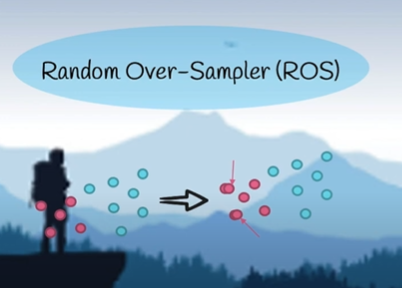

In [ ]:
#Importamos los paquetes
from imblearn.over_sampling import RandomOverSampler, SMOTE

#Inicialización de los métodos de sobremuestreo
#ROS
ros = RandomOverSampler()#random_state = 0
#SMOTE
smote = SMOTE()

In [ ]:
target= df.Etiqueta
no_desertor= target.sum()
desertor = target.shape[0]- no_desertor

print("no desertor: ", no_desertor)
print("desertor: ", desertor)
data= df.drop(['Etiqueta'], axis=1) 

no desertor:  4223
desertor:  1322


In [ ]:
#ROS. Duplica muestras de la clase menos representadas
dataRos, targetRos = ros.fit_resample(data,target)
no_desertor_ros = targetRos.sum()
desertor_ros = targetRos.shape[0]- no_desertor_ros
print('No desertor:  ', no_desertor_ros, ' , desertor: ', desertor_ros )
dataRos

No desertor:   4223  , desertor:  4223


,DEPRE,alcohol,drogas,psicosocial,familiar,economica,academica,pagado,edad,icfes,SEXO,ESTRATO,NATURALEZA DE COLEGIO
0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,1,3,1
1,1.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,0,3,0
2,1.0,0.0,0.0,2.0,1.0,2.0,1.0,2.0,0.0,2.0,1,4,0
3,2.0,1.0,0.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0,3,0
4,1.0,0.0,0.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8441,1.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,1.0,1,1,0
8442,0.0,0.0,1.0,0.0,0.0,2.0,1.0,2.0,3.0,2.0,0,2,1
8443,1.0,0.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,1,1,0
8444,1.0,0.0,1.0,1.0,0.0,2.0,1.0,2.0,1.0,1.0,1,4,0


La otra técnica que utilizaremos es conocida como SMOTE, y es un enfoque de sobremuestreo en el que la clase minoritaria se sobremuestreará creando ejemplos sintéticos basados en las características de los datos. <br> <br>
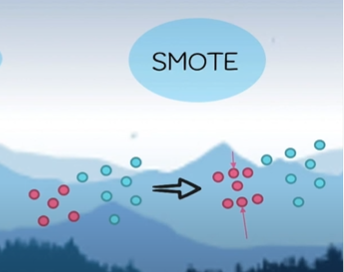

In [ ]:
dataSmote, targetSmote = smote.fit_resample(data,target)
no_desertor_smote = targetSmote.sum()
desertor_smote = targetSmote.shape[0]- no_desertor_smote
print('No desertor: ', no_desertor_smote, ' ,desertor: ', desertor_smote )
dataSmote

No desertor:  4223  ,desertor:  4223


,DEPRE,alcohol,drogas,psicosocial,familiar,economica,academica,pagado,edad,icfes,SEXO,ESTRATO,NATURALEZA DE COLEGIO
0,1.000000,0.0,1.000000,1.0,0.000000,0.000000,1.0,2.0,0.000000,1.0,1,3,1
1,1.000000,0.0,1.000000,1.0,0.000000,1.000000,2.0,1.0,1.000000,1.0,0,3,0
2,1.000000,0.0,0.000000,2.0,1.000000,2.000000,1.0,2.0,0.000000,2.0,1,4,0
3,2.000000,1.0,0.000000,2.0,2.000000,1.000000,2.0,2.0,1.000000,1.0,0,3,0
4,1.000000,0.0,0.000000,3.0,2.000000,2.000000,2.0,2.0,1.000000,2.0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8441,1.000000,0.0,1.000000,1.0,0.082766,2.000000,1.0,3.0,1.000000,1.0,0,2,1
8442,1.000000,0.0,0.559847,1.0,2.000000,2.440153,2.0,0.0,1.000000,1.0,1,1,0
8443,2.000000,1.0,1.000000,2.0,2.000000,2.000000,2.0,1.0,0.329896,1.0,0,2,0
8444,1.307163,1.0,0.692837,2.0,0.692837,0.000000,1.0,3.0,1.000000,2.0,0,5,1


# Modelo

Según la literatura, los algoritmos más utilizados para afrontar el problema de la deserción estudiantil, son los árboles de decisiones, las redes bayesianas y los bosques aleatorios. <br>
En este caso utilizaremos los árboles de decisión y los bosques aleatorios. 
El árbol de decisión es, como su nombre lo indica, un modelo predictivo que toma decisiones en forma de árbol.<br>
Los bosques aleatorios, son la combinación de árboles predictores en lugar de uno solo, para clasificar un conjunto de datos cada uno de estos árboles genera una clasificación y la decisión "más votada" será la predicción del algoritmo. <br> <br>
A continuación probaremos los dos algoritmos, a los dos conjuntos generados por sobremuestreo, adicional a esto seleccionaremos características por medio de tres algoritmos:

1.   Seleccionar los mejores K (f_classif)
2.   Análisis de componentes principales (PCA)(Principal component analysis)
3.   Regresión de mínimos cuadrados parciales (PLS)(Partial Least Squares)

Para ajustar hiper parámetros probaremos los pipelines combinando los parámetros del algoritmo predictivo y el algoritmo de reducción de características




Una de las métricas importantes que evaluaremos será la sensibilidad(exhaustividad) de la clase  de estudiantes desertores, ya que una sensibilidad alta, indica que estamos detectando la mayor cantidad de casos de deserción. Por ejemplo, si la sensibilidad de la clase de desertores en 0.8, podremos concluir que nuestro algoritmo está detectando 8 de 10 casos de posible riesgo estudiantil. Aunque la mejor métrica para medir el performance del modelo será F1 Score ya que tiene  en cuenta tanto precisión como sensibilidad.  <br> <br> 
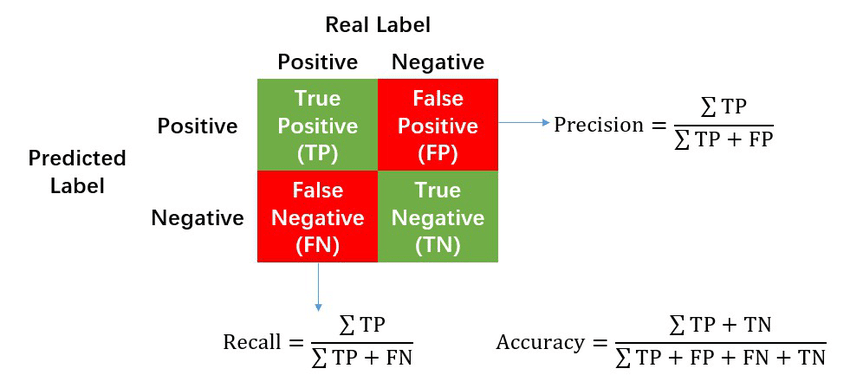

## partición ROS

### Decision Tree Classifier

####  partición y matriz de correlación

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn.metrics import f1_score
import io
df_aux= df

In [ ]:
y= targetRos
X=  dataRos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
X_train.shape

(5912, 13)

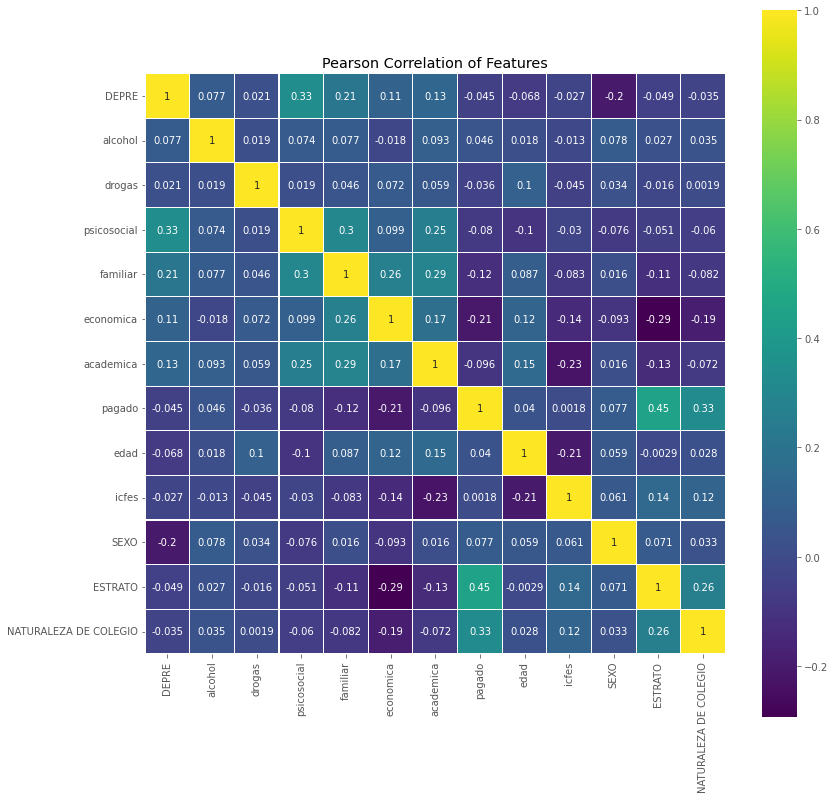

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(13,13))
plt.title('Pearson Correlation of Features')
sb.heatmap(X.astype(float).corr(),
           vmax=1.0,
           cmap=colormap,
           annot=True,
           linewidths=0.1,
           linecolor='white',
           square=True)

#### SelectKBest  

Su funcionamiento es simple: Elimina todas las características, excepto las k características de puntuación más alta. El algoritmo utilizado por defecto para calcular este puntaje es llamado ANOVA (Analysis of variance), y analiza las varianzas para comparar múltiples medias. El estadístico estudiado en este algoritmo, conocido como F-ratio, es el ratio entre la varianza de las medias de cada característica y el promedio de la varianza de las características. 

In [ ]:
y= targetRos
X=  dataRos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [1]:
best=SelectKBest(k=10)
X_new = best.fit_transform(X_train, y_train)
print(X_new.shape)
selected = best.get_support(indices=True)
print(X_train.columns[selected])

NameError: ignored

In [ ]:
used_features =X_train.columns[selected]

In [ ]:
list(used_features)



['alcohol',
 'drogas',
 'psicosocial',
 'familiar',
 'economica',
 'academica',
 'edad',
 'icfes',
 'SEXO',
 'NATURALEZA DE COLEGIO']

In [ ]:
clf = DecisionTreeClassifier()

clf.fit(
    X_train[used_features].values,
    y_train
    )  
y_pred = clf.predict(X_test[used_features].values)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train[used_features].values, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test[used_features].values, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test[used_features].values)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
f1_score(y_test, y_pred, average='macro')

Exactitud en el Entrenamiento: 0.85
Exactitud en la Validación (test): 0.75

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.71      0.84      0.77      1266
           1       0.80      0.66      0.72      1268

    accuracy                           0.75      2534
   macro avg       0.76      0.75      0.75      2534
weighted avg       0.76      0.75      0.75      2534

 Confusion matrix: 
[[1063  203]
 [ 435  833]]

 F1 SCORE: 


0.7461326931580641

In [ ]:
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(clf,
                              out_file=f,                              
                              impurity = True,
                              feature_names = list(used_features),
                              class_names = ['Deserta', 'No deserta'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
y_df_test= df_test.Etiqueta
data_test= df_test.drop(['Etiqueta'], axis=1) 


In [ ]:
type(X_test)

pandas.core.frame.DataFrame

In [ ]:
type(data_test)

pandas.core.frame.DataFrame

In [ ]:
#predict 

y_predict = clf.predict(data_test[used_features].values)
print('Exactitud  (test): {:.2f}'
     .format(clf.score(data_test[used_features].values, y_df_test)))

Exactitud  (test): 0.53


In [ ]:
cm = confusion_matrix(y_df_test, y_predict)
cm

array([[42, 58],
       [37, 63]])

In [ ]:
print(f'Reporte de clasificación:')
print(classification_report(y_df_test, y_predict))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.53      0.42      0.47       100
           1       0.52      0.63      0.57       100

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.52       200
weighted avg       0.53      0.53      0.52       200



#### SelectKBest Pipeline 

El pipeline es simplemente una forma de codificar y automatizar un flujo, para, en este caso, producir el mejor modelo posible de Machine learning. Los parámetros a analizar serán la cantidad  K de características en el algoritmo de SelectKBest, y en el árbol queremos descubrir la mayor profundidad, el criterio y el divisor que nos dé el mejor modelo posible. 

In [ ]:
y= targetRos
X=  dataRos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import SelectKBest, f_classif, chi2

In [ ]:
best= SelectKBest()
clf= DecisionTreeClassifier()

pipelineKBest = Pipeline(
    steps=[
        ("selectKbest", best),
        ("clf", clf),
    ]
)
best.get_params().keys(), clf.get_params().keys()

(dict_keys(['k', 'score_func']),
 dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter']))

In [ ]:
param_grid ={
    "selectKbest__k": list(range(1,14)),
    "clf__max_depth": [2,4,6,8,10,12],
    "clf__criterion": ['gini', 'entropy'],
    "clf__splitter":['random', 'best']

}

gridSearchCV = GridSearchCV(pipelineKBest, param_grid, error_score='raise')
print(gridSearchCV)
gridSearchCV.fit(X, y)

print("mejor score:   ",gridSearchCV.best_score_)

GridSearchCV(error_score='raise',
             estimator=Pipeline(steps=[('selectKbest', SelectKBest()),
                                       ('clf', DecisionTreeClassifier())]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [2, 4, 6, 8, 10, 12],
                         'clf__splitter': ['random', 'best'],
                         'selectKbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13]})
mejor score:    0.7246050847635763


In [ ]:
gridSearchCV.best_params_

{'clf__criterion': 'gini',
 'clf__max_depth': 12,
 'clf__splitter': 'best',
 'selectKbest__k': 13}

In [ ]:
k=gridSearchCV.best_params_['selectKbest__k']
max_depth=gridSearchCV.best_params_['clf__max_depth']
criterion=gridSearchCV.best_params_['clf__criterion']
splitter=gridSearchCV.best_params_['clf__splitter']

In [ ]:
best=SelectKBest(k=k)
X_new = best.fit_transform(X_train, y_train)
print(X_new.shape)
selected = best.get_support(indices=True)
print(X_train.columns[selected])

(5912, 13)
Index(['DEPRE', 'alcohol', 'drogas', 'psicosocial', 'familiar', 'economica',
       'academica', 'pagado', 'edad', 'icfes', 'SEXO', 'ESTRATO',
       'NATURALEZA DE COLEGIO'],
      dtype='object')


In [ ]:
used_features =X_train.columns[selected]

In [ ]:
clf = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth)

clf.fit(
    X_train[used_features].values,
    y_train
    )  
y_pred = clf.predict(X_test[used_features].values)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train[used_features].values, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test[used_features].values, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test[used_features].values)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
f1_score(y_test, y_pred, average='macro')

Exactitud en el Entrenamiento: 0.81
Exactitud en la Validación (test): 0.71

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      1266
           1       0.70      0.74      0.72      1268

    accuracy                           0.71      2534
   macro avg       0.71      0.71      0.71      2534
weighted avg       0.71      0.71      0.71      2534

 Confusion matrix: 
[[875 391]
 [334 934]]

 F1 SCORE: 


0.7137358934505096

In [ ]:
y_df_test= df_test.Etiqueta
data_test= df_test.drop(['Etiqueta'], axis=1) 


In [ ]:
type(X_test)

pandas.core.frame.DataFrame

In [ ]:
type(data_test)

pandas.core.frame.DataFrame

In [ ]:
#predict 

y_predict = clf.predict(data_test[used_features].values)
print('Exactitud  (test): {:.2f}'
     .format(clf.score(data_test[used_features].values, y_df_test)))

Exactitud  (test): 0.51


In [ ]:
cm = confusion_matrix(y_df_test, y_predict)
cm

array([[37, 63],
       [35, 65]])

In [ ]:
print(f'Reporte de clasificación:')
print(classification_report(y_df_test, y_predict))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.51      0.37      0.43       100
           1       0.51      0.65      0.57       100

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.50       200



#### PCA

PCA es un método estadístico que permite simplificar la complejidad de espacios muestrales con muchas dimensiones a la vez que conserva su información. Supóngase que existe una muestra con n individuos cada uno con p variables (X1, X2, …, Xp), es decir, el espacio muestral tiene p dimensiones. PCA permite encontrar un número de factores subyacentes (z < p) que explican aproximadamente lo mismo que las p variables originales. Donde antes se necesitaban p valores para caracterizar a cada individuo, ahora bastan z valores. Cada una de estas z nuevas variables recibe el nombre de componente principal. <br> 


<br> <br> 
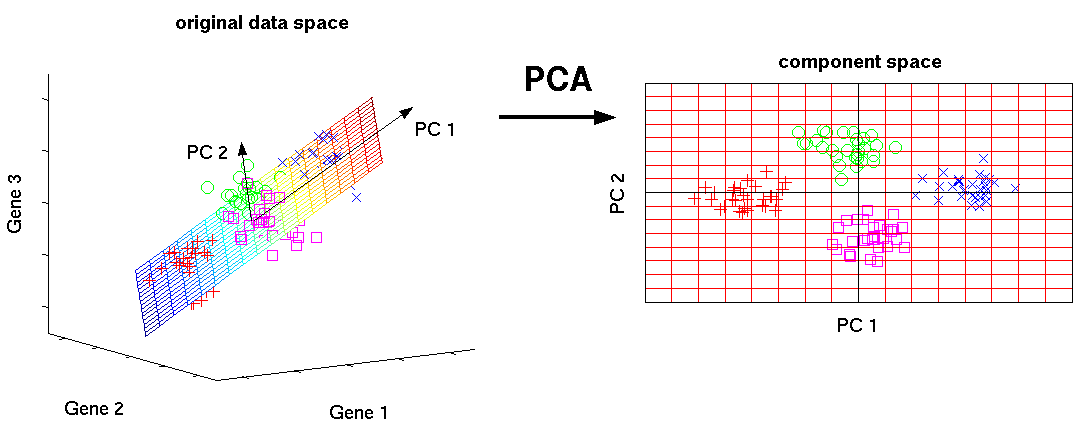

In [ ]:
y= targetRos
X=  dataRos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
X_train.shape


(5912, 13)

In [ ]:
nombres= list(X_train.columns.values)

In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.85)
pca.fit(X_train)
X_train= pca.transform(X_train)
X_test= pca.transform(X_test)


In [ ]:
df_pca= pd.DataFrame(pca.components_.T)
df_pca.index= pd.Series(nombres)
df_pca.set_axis(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8','PC9'], axis=1)
df_pca

,0,1,2,3,4,5,6,7,8
DEPRE,-0.079701,0.187839,-0.327425,0.021950,-0.130561,-0.261346,-0.492787,0.096801,-0.313195
alcohol,0.006152,0.083378,-0.037843,0.080629,-0.011190,0.097427,0.042946,0.042541,0.247369
drogas,-0.036842,0.064225,0.102447,0.010610,0.053271,-0.076810,-0.111050,0.277461,-0.383537
psicosocial,-0.135872,0.312337,-0.497574,0.174198,-0.048167,-0.111451,-0.272973,0.097882,0.584773
familiar,-0.228874,0.470273,-0.204610,-0.186682,0.186604,0.594072,-0.036232,-0.407551,-0.291737
economica,-0.341653,0.260401,0.159675,-0.764644,-0.223577,-0.217706,0.193085,0.183494,0.178756
academica,-0.197377,0.460846,-0.008433,0.438921,0.093645,-0.126436,0.553414,0.382640,-0.191473
pagado,0.565405,0.358847,0.120787,0.025290,-0.683944,0.204131,-0.011559,0.054465,-0.048409
edad,-0.029131,0.319757,0.671812,0.100517,0.305772,0.061506,-0.502537,0.163896,0.163761
icfes,0.104522,-0.226409,-0.257368,-0.231633,0.142337,0.455934,-0.103650,0.716990,-0.065682


In [ ]:
X_train[0]

array([-0.33637383, -0.03458127,  0.26447619, -0.13778009,  0.41206013,
        0.11994834,  0.16977255, -0.34270331,  1.0902886 ])

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", splitter="random")

clf.fit(
    X_train,
    y_train
    )  
y_pred = clf.predict(X_test)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
f1_score(y_test, y_pred, average='macro')

Exactitud en el Entrenamiento: 0.96
Exactitud en la Validación (test): 0.80

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.74      0.91      0.82      1250
           1       0.89      0.68      0.77      1284

    accuracy                           0.80      2534
   macro avg       0.81      0.80      0.79      2534
weighted avg       0.81      0.80      0.79      2534

 Confusion matrix: 
[[1139  111]
 [ 406  878]]

 F1 SCORE: 


0.793787063978083

In [ ]:
y_df_test= df_test.Etiqueta.values
data_test= df_test.drop(['Etiqueta'], axis=1) 
#data_test

In [ ]:
data_test= pca.transform(data_test)
data_test

array([[-0.77749336,  0.67447221,  0.18915576, ...,  0.21196617,
        -0.44813425, -0.94346464],
       [-0.66250834,  0.25025464, -0.19307486, ...,  1.25023588,
        -0.66628994, -0.54666218],
       [-0.51146503, -0.23412089,  0.85712191, ...,  0.70393564,
        -0.5770935 ,  0.82043974],
       ...,
       [-0.19209781,  0.16586374,  0.0963686 , ...,  0.5301009 ,
        -0.14355718,  0.72005965],
       [ 0.16993182,  0.77750588, -0.21263665, ...,  0.09078326,
         0.99468791,  0.46322787],
       [ 0.49278284, -1.3489297 , -0.5888471 , ...,  0.52049072,
         0.73250072,  0.02333109]])

In [ ]:
#predict 

y_predict = clf.predict(data_test)
print('Exactitud  (test): {:.2f}'
     .format(clf.score(data_test, y_df_test)))

Exactitud  (test): 0.54


In [ ]:
cm = confusion_matrix(y_df_test, y_predict)
cm

array([[41, 59],
       [33, 67]])

In [ ]:
print(f'Reporte de clasificación:')
print(classification_report(y_df_test, y_predict))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.55      0.41      0.47       100
           1       0.53      0.67      0.59       100

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.53       200
weighted avg       0.54      0.54      0.53       200



#### PCA Pipeline

In [ ]:
y= targetRos
X=  dataRos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
X_train.shape

(5912, 13)

In [ ]:
pca= PCA()
clf= DecisionTreeClassifier()

pipelinePCA = Pipeline(
    steps=[
        ("pca", pca),
        ("clf", clf),
    ]
)
pca.get_params().keys(), clf.get_params().keys()

(dict_keys(['copy', 'iterated_power', 'n_components', 'random_state', 'svd_solver', 'tol', 'whiten']),
 dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter']))

In [ ]:
param_grid = {
    "pca__n_components": [0.75, 0.80, 0.85, 0.90],
    "clf__max_depth": [2,4,6,8,10,12],
    "clf__criterion": ['gini', 'entropy'],
    "clf__splitter":['random', 'best']
}

gridSearchCV = GridSearchCV(pipelinePCA, param_grid)

gridSearchCV.fit(X, y)
print(gridSearchCV)
gridSearchCV.best_score_


In [ ]:
gridSearchCV.best_params_

In [ ]:
n_components=gridSearchCV.best_params_['pca__n_components']
max_depth=gridSearchCV.best_params_['clf__max_depth']
criterion=gridSearchCV.best_params_['clf__criterion']
splitter=gridSearchCV.best_params_['clf__splitter']

In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(n_components)
pca.fit(X_train)
X_train= pca.transform(X_train)
X_test= pca.transform(X_test)


In [ ]:
X_train.shape

In [ ]:
clf = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth)

clf.fit(
    X_train,
    y_train
    )  
y_pred = clf.predict(X_test)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
f1_score(y_test, y_pred, average='macro')

In [ ]:
y_df_test= df_test.Etiqueta.values
data_test= df_test.drop(['Etiqueta'], axis=1) 
#data_test

In [ ]:
data_test= pca.transform(data_test)
data_test

In [ ]:
#predict 

y_predict = clf.predict(data_test)
print('Exactitud  (test): {:.2f}'
     .format(clf.score(data_test, y_df_test)))

In [ ]:
cm = confusion_matrix(y_df_test, y_predict)
cm

In [ ]:
print(f'Reporte de clasificación:')
print(classification_report(y_df_test, y_predict))

#### PLS

PLS es una técnica que reduce los predictores a un conjunto más pequeño de componentes no correlacionados y realiza una regresión de mínimos cuadrados sobre estos componentes, en lugar de hacerlo sobre los datos originales. Su principal diferencia con (PCA) es que  trata una variable como variable dependiente e incluye las relaciones con esa variable en su minimización, por lo tanto se le considera un método supervisado. <br> <br> 
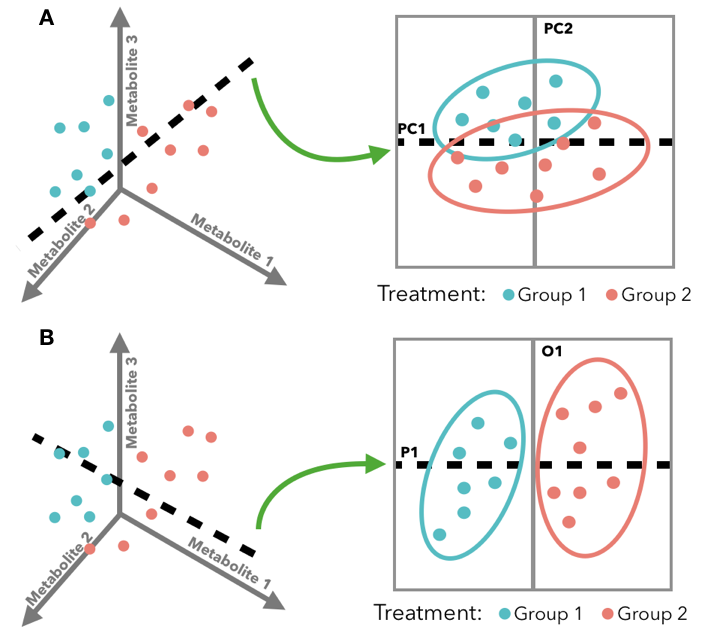

In [ ]:
y= targetRos
X=  dataRos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
X_train.shape

In [ ]:
from sklearn.cross_decomposition import PLSRegression
# Make an instance of the Model
pls = PLSRegression(n_components=13)
pls.fit(X_train, y_train)
X_train= pls.transform(X_train)
X_test= pls.transform(X_test)


In [ ]:
X_train.shape

In [ ]:
clf = DecisionTreeClassifier()

clf.fit(
    X_train,
    y_train
    )  
y_pred = clf.predict(X_test)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
f1_score(y_test, y_pred, average='macro')

In [ ]:
y_df_test= df_test.Etiqueta.values
data_test= df_test.drop(['Etiqueta'], axis=1) 
#data_test

In [ ]:
data_test= pls.transform(data_test)


In [ ]:
#predict 

y_predict = clf.predict(data_test)
print('Exactitud  (test): {:.2f}'
     .format(clf.score(data_test, y_df_test)))

In [ ]:
cm = confusion_matrix(y_df_test, y_predict)
cm

In [ ]:
print(f'Reporte de clasificación:')
print(classification_report(y_df_test, y_predict))

#### PLS Pipeline

In [ ]:
y= targetRos
X=  dataRos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
X_train.shape

In [ ]:
pls= PLSRegression()
clf= DecisionTreeClassifier()

pipelinePLS = Pipeline(
    steps=[
        ("pls", pls),
        #("clf", clf),
    ]
)
pls.get_params().keys(), clf.get_params().keys()

In [ ]:
param_grid = {
    "pls__n_components": list(range(1,14)),
    # "clf__max_depth": [2,4,6,8,10,12],
    # "clf__criterion": ['gini', 'entropy'],
    # "clf__splitter":['random', 'best']
}

gridSearchCV = GridSearchCV(pipelinePLS, param_grid, error_score='raise')

gridSearchCV.fit(X, y)
print(gridSearchCV)
gridSearchCV.best_params_


In [ ]:
n_components = gridSearchCV.best_params_['pls__n_components']
n_components

In [ ]:
from sklearn.cross_decomposition import PLSRegression
# Make an instance of the Model
pls = PLSRegression(n_components=n_components)
pls.fit(X_train, y_train)
X_train= pls.transform(X_train)
X_test= pls.transform(X_test)


In [ ]:
X_train.shape

In [ ]:
clf = DecisionTreeClassifier()

clf.fit(
    X_train,
    y_train
    )  
y_pred = clf.predict(X_test)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
f1_score(y_test, y_pred, average='macro')

In [ ]:
y_df_test= df_test.Etiqueta.values
data_test= df_test.drop(['Etiqueta'], axis=1) 
#data_test

In [ ]:
data_test= pls.transform(data_test)


In [ ]:
#predict 

y_predict = clf.predict(data_test)
print('Exactitud  (test): {:.2f}'
     .format(clf.score(data_test, y_df_test)))

In [ ]:
cm = confusion_matrix(y_df_test, y_predict)
cm

In [ ]:
print(f'Reporte de clasificación:')
print(classification_report(y_df_test, y_predict))

### Random Forest 

####  partición y matriz de correlación

In [ ]:
from sklearn.ensemble import RandomForestClassifier
df_aux= df

In [ ]:
y= targetRos
X=  dataRos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
X_train.shape

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(13,13))
plt.title('Pearson Correlation of Features')
sb.heatmap(X.astype(float).corr(),
           vmax=1.0,
           cmap=colormap,
           annot=True,
           linewidths=0.1,
           linecolor='white',
           square=True)

#### SelectKBest  

In [ ]:
y= targetRos
X=  dataRos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [ ]:
best=SelectKBest(k=10)
X_new = best.fit_transform(X_train, y_train)
print(X_new.shape)
selected = best.get_support(indices=True)
print(X_train.columns[selected])

In [ ]:
used_features =X_train.columns[selected]

In [ ]:
clf = RandomForestClassifier()

clf.fit(
    X_train[used_features].values,
    y_train
    )  
y_pred = clf.predict(X_test[used_features].values)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train[used_features].values, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test[used_features].values, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test[used_features].values)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
f1_score(y_test, y_pred, average='macro')

In [ ]:
y_df_test= df_test.Etiqueta
data_test= df_test.drop(['Etiqueta'], axis=1) 


In [ ]:
type(X_test)

In [ ]:
type(data_test)

In [ ]:
#predict 

y_predict = clf.predict(data_test[used_features].values)
print('Exactitud  (test): {:.2f}'
     .format(clf.score(data_test[used_features].values, y_df_test)))

In [ ]:
cm = confusion_matrix(y_df_test, y_predict)
cm

In [ ]:
print(f'Reporte de clasificación:')
print(classification_report(y_df_test, y_predict))

#### SelectKBest Pipeline 

In [ ]:
y= targetRos
X=  dataRos

In [ ]:
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import SelectKBest, f_classif, chi2

In [ ]:
best= SelectKBest()
clf= RandomForestClassifier()

pipelineKBest = Pipeline(
    steps=[
        ("selectKbest", best),
        ("clf", clf),
    ]
)
best.get_params().keys(), clf.get_params().keys()

In [ ]:
param_grid ={
    "selectKbest__k": list(range(1,14)),
    "clf__max_depth": [2,4,6,8,10,12],
    "clf__criterion": ['gini', 'entropy'],
    "clf__bootstrap": [True, False]
    

}

gridSearchCV = GridSearchCV(pipelineKBest, param_grid, error_score='raise')
print(gridSearchCV)
gridSearchCV.fit(X, y)

print("mejor score:   ",gridSearchCV.best_score_)

In [ ]:
gridSearchCV.best_params_

In [ ]:
k=gridSearchCV.best_params_['selectKbest__k']
max_depth=gridSearchCV.best_params_['clf__max_depth']
criterion=gridSearchCV.best_params_['clf__criterion']
bootstrap=gridSearchCV.best_params_['clf__bootstrap']

In [ ]:
y= targetRos
X=  dataRos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [ ]:
best=SelectKBest(k=k)
X_new = best.fit_transform(X_train, y_train)
print(X_new.shape)
selected = best.get_support(indices=True)
print(X_train.columns[selected])

In [ ]:
used_features =X_train.columns[selected]

In [ ]:
clf = RandomForestClassifier(criterion=criterion, bootstrap=bootstrap, max_depth=max_depth)

clf.fit(
    X_train[used_features].values,
    y_train
    )  
y_pred = clf.predict(X_test[used_features].values)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train[used_features].values, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test[used_features].values, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test[used_features].values)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
f1_score(y_test, y_pred, average='macro')

In [ ]:
y_df_test= df_test.Etiqueta
data_test= df_test.drop(['Etiqueta'], axis=1) 


In [ ]:
type(X_test)

In [ ]:
type(data_test)

In [ ]:
#predict 

y_predict = clf.predict(data_test[used_features].values)
print('Exactitud  (test): {:.2f}'
     .format(clf.score(data_test[used_features].values, y_df_test)))

In [ ]:
cm = confusion_matrix(y_df_test, y_predict)
cm

In [ ]:
print(f'Reporte de clasificación:')
print(classification_report(y_df_test, y_predict))

#### PCA

In [ ]:
y= targetRos
X=  dataRos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
X_train.shape

In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.85)
pca.fit(X_train)
X_train= pca.transform(X_train)
X_test= pca.transform(X_test)


In [ ]:
X_train.shape

In [ ]:
clf = RandomForestClassifier()

clf.fit(
    X_train,
    y_train
    )  
y_pred = clf.predict(X_test)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
f1_score(y_test, y_pred, average='macro')

In [ ]:
y_df_test= df_test.Etiqueta.values
data_test= df_test.drop(['Etiqueta'], axis=1) 
#data_test

In [ ]:
data_test= pca.transform(data_test)
data_test

In [ ]:
#predict 

y_predict = clf.predict(data_test)
print('Exactitud  (test): {:.2f}'
     .format(clf.score(data_test, y_df_test)))

In [ ]:
cm = confusion_matrix(y_df_test, y_predict)
cm

In [ ]:
print(f'Reporte de clasificación:')
print(classification_report(y_df_test, y_predict))

#### PCA Pipeline

In [ ]:
y= targetRos
X=  dataRos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
X_train.shape

In [ ]:
pca= PCA()
clf= RandomForestClassifier()

pipelinePCA = Pipeline(
    steps=[
        ("pca", pca),
        ("clf", clf),
    ]
)
pca.get_params().keys(), clf.get_params().keys()

In [ ]:
param_grid = {
    "pca__n_components": [0.75, 0.80, 0.85, 0.90],
    "clf__max_depth": [2,4,6,8,10,12],
    "clf__criterion": ['gini', 'entropy'],
    "clf__bootstrap": [True, False]
    
}

gridSearchCV = GridSearchCV(pipelinePCA, param_grid)

gridSearchCV.fit(X, y)
print(gridSearchCV)
gridSearchCV.best_score_


In [ ]:
gridSearchCV.best_params_

In [ ]:
n_components=gridSearchCV.best_params_['pca__n_components']
max_depth=gridSearchCV.best_params_['clf__max_depth']
criterion=gridSearchCV.best_params_['clf__criterion']
bootstrap=gridSearchCV.best_params_['clf__bootstrap']

In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(n_components)
pca.fit(X_train)
X_train= pca.transform(X_train)
X_test= pca.transform(X_test)


In [ ]:
X_train.shape

In [ ]:
clf = RandomForestClassifier(criterion=criterion, bootstrap=bootstrap, max_depth=max_depth)

clf.fit(
    X_train,
    y_train
    )  
y_pred = clf.predict(X_test)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
f1_score(y_test, y_pred, average='macro')

In [ ]:
y_df_test= df_test.Etiqueta.values
data_test= df_test.drop(['Etiqueta'], axis=1) 
#data_test

In [ ]:
data_test= pca.transform(data_test)
data_test

In [ ]:
#predict 

y_predict = clf.predict(data_test)
print('Exactitud  (test): {:.2f}'
     .format(clf.score(data_test, y_df_test)))

In [ ]:
cm = confusion_matrix(y_df_test, y_predict)
cm

In [ ]:
print(f'Reporte de clasificación:')
print(classification_report(y_df_test, y_predict))

#### PLS

In [ ]:
y= targetRos
X=  dataRos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
X_train.shape

In [ ]:
from sklearn.cross_decomposition import PLSRegression
# Make an instance of the Model
pls = PLSRegression(n_components=13)
pls.fit(X_train, y_train)
X_train= pls.transform(X_train)
X_test= pls.transform(X_test)


In [ ]:
X_train.shape

In [ ]:
clf = RandomForestClassifier()

clf.fit(
    X_train,
    y_train
    )  
y_pred = clf.predict(X_test)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
f1_score(y_test, y_pred, average='macro')

In [ ]:
y_df_test= df_test.Etiqueta.values
data_test= df_test.drop(['Etiqueta'], axis=1) 
#data_test

In [ ]:
data_test= pls.transform(data_test)


In [ ]:
#predict 

y_predict = clf.predict(data_test)
print('Exactitud  (test): {:.2f}'
     .format(clf.score(data_test, y_df_test)))

In [ ]:
cm = confusion_matrix(y_df_test, y_predict)
cm

In [ ]:
print(f'Reporte de clasificación:')
print(classification_report(y_df_test, y_predict))

#### PLS Pipeline

In [ ]:
y= targetRos
X=  dataRos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
X_train.shape

In [ ]:
pls= PLSRegression()

pipelinePLS = Pipeline(
    steps=[
        ("pls", pls),
        #("clf", clf),
    ]
)
pls.get_params().keys(), clf.get_params().keys()

In [ ]:
param_grid = {
    "pls__n_components": list(range(1,14)),
    # "clf__max_depth": [2,4,6,8,10,12],
    # "clf__criterion": ['gini', 'entropy'],
    # "clf__splitter":['random', 'best']
}

gridSearchCV = GridSearchCV(pipelinePLS, param_grid)

gridSearchCV.fit(X, y)
print(gridSearchCV)
gridSearchCV.best_params_


In [ ]:
n_components = gridSearchCV.best_params_['pls__n_components']
n_components

In [ ]:
from sklearn.cross_decomposition import PLSRegression
# Make an instance of the Model
pls = PLSRegression(n_components=n_components)
pls.fit(X_train, y_train)
X_train= pls.transform(X_train)
X_test= pls.transform(X_test)


In [ ]:
X_train.shape

In [ ]:
clf = RandomForestClassifier()

clf.fit(
    X_train,
    y_train
    )  
y_pred = clf.predict(X_test)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
f1_score(y_test, y_pred, average='macro')

In [ ]:
y_df_test= df_test.Etiqueta.values
data_test= df_test.drop(['Etiqueta'], axis=1) 
#data_test

In [ ]:
data_test= pls.transform(data_test)


In [ ]:
#predict 

y_predict = clf.predict(data_test)
print('Exactitud  (test): {:.2f}'
     .format(clf.score(data_test, y_df_test)))

In [ ]:
cm = confusion_matrix(y_df_test, y_predict)
cm

In [ ]:
print(f'Reporte de clasificación:')
print(classification_report(y_df_test, y_predict))

## partición SMOTE

### Decision Tree Classifier

####  partición y matriz de correlación

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn.metrics import f1_score
import io
df_aux= df

In [ ]:

y= targetSmote
X=  dataSmote
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
X_train.shape

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(13,13))
plt.title('Pearson Correlation of Features')
sb.heatmap(X.astype(float).corr(),
           vmax=1.0,
           cmap=colormap,
           annot=True,
           linewidths=0.1,
           linecolor='white',
           square=True)

#### SelectKBest  

In [ ]:

y= targetSmote
X=  dataSmote
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [ ]:
best=SelectKBest(k=10)
X_new = best.fit_transform(X_train, y_train)
print(X_new.shape)
selected = best.get_support(indices=True)
print(X_train.columns[selected])

In [ ]:
used_features =X_train.columns[selected]

In [ ]:
clf = DecisionTreeClassifier()

clf.fit(
    X_train[used_features].values,
    y_train
    )  
y_pred = clf.predict(X_test[used_features].values)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train[used_features].values, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test[used_features].values, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test[used_features].values)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
f1_score(y_test, y_pred, average='macro')

In [ ]:
y_df_test= df_test.Etiqueta
data_test= df_test.drop(['Etiqueta'], axis=1) 


In [ ]:
type(X_test)

In [ ]:
type(data_test)

In [ ]:
#predict 

y_predict = clf.predict(data_test[used_features].values)
print('Exactitud  (test): {:.2f}'
     .format(clf.score(data_test[used_features].values, y_df_test)))

In [ ]:
cm = confusion_matrix(y_df_test, y_predict)
cm

In [ ]:
print(f'Reporte de clasificación:')
print(classification_report(y_df_test, y_predict))

#### SelectKBest Pipeline 

In [ ]:

y= targetSmote
X=  dataSmote

In [ ]:
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import SelectKBest, f_classif, chi2

In [ ]:
best= SelectKBest()
clf= DecisionTreeClassifier()

pipelineKBest = Pipeline(
    steps=[
        ("selectKbest", best),
        ("clf", clf),
    ]
)
best.get_params().keys(), clf.get_params().keys()

In [ ]:
param_grid ={
    "selectKbest__k": list(range(1,14)),
    "clf__max_depth": [2,4,6,8,10,12],
    "clf__criterion": ['gini', 'entropy'],
    "clf__splitter":['random', 'best']

}

gridSearchCV = GridSearchCV(pipelineKBest, param_grid)
print(gridSearchCV)
gridSearchCV.fit(X, y)

print("mejor score:   ",gridSearchCV.best_score_)

In [ ]:
gridSearchCV.best_params_

In [ ]:
k=gridSearchCV.best_params_['selectKbest__k']
max_depth=gridSearchCV.best_params_['clf__max_depth']
criterion=gridSearchCV.best_params_['clf__criterion']
splitter=gridSearchCV.best_params_['clf__splitter']

In [ ]:
y= targetRos
X=  dataRos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [ ]:
best=SelectKBest(k=k)
X_new = best.fit_transform(X_train, y_train)
print(X_new.shape)
selected = best.get_support(indices=True)
print(X_train.columns[selected])

In [ ]:
used_features =X_train.columns[selected]

In [ ]:
clf = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth)

clf.fit(
    X_train[used_features].values,
    y_train
    )  
y_pred = clf.predict(X_test[used_features].values)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train[used_features].values, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test[used_features].values, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test[used_features].values)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
f1_score(y_test, y_pred, average='macro')

In [ ]:
y_df_test= df_test.Etiqueta
data_test= df_test.drop(['Etiqueta'], axis=1) 


In [ ]:
type(X_test)

In [ ]:
type(data_test)

In [ ]:
#predict 

y_predict = clf.predict(data_test[used_features].values)
print('Exactitud  (test): {:.2f}'
     .format(clf.score(data_test[used_features].values, y_df_test)))

In [ ]:
cm = confusion_matrix(y_df_test, y_predict)
cm

In [ ]:
print(f'Reporte de clasificación:')
print(classification_report(y_df_test, y_predict))

#### PCA

In [ ]:

y= targetSmote
X=  dataSmote
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
X_train.shape

In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.85)
pca.fit(X_train)
X_train= pca.transform(X_train)
X_test= pca.transform(X_test)


In [ ]:
X_train.shape

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", splitter="random")

clf.fit(
    X_train,
    y_train
    )  
y_pred = clf.predict(X_test)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
f1_score(y_test, y_pred, average='macro')

In [ ]:
y_df_test= df_test.Etiqueta.values
data_test= df_test.drop(['Etiqueta'], axis=1) 
#data_test

In [ ]:
data_test= pca.transform(data_test)
data_test

In [ ]:
#predict 

y_predict = clf.predict(data_test)
print('Exactitud  (test): {:.2f}'
     .format(clf.score(data_test, y_df_test)))

In [ ]:
cm = confusion_matrix(y_df_test, y_predict)
cm

In [ ]:
print(f'Reporte de clasificación:')
print(classification_report(y_df_test, y_predict))

#### PCA Pipeline

In [ ]:

y= targetSmote
X=  dataSmote
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
X_train.shape

In [ ]:
pca= PCA()
clf= DecisionTreeClassifier()

pipelinePCA = Pipeline(
    steps=[
        ("pca", pca),
        ("clf", clf),
    ]
)
pca.get_params().keys(), clf.get_params().keys()

In [ ]:
param_grid = {
    "pca__n_components": [0.75, 0.80, 0.85, 0.90],
    "clf__max_depth": [2,4,6,8,10,12],
    "clf__criterion": ['gini', 'entropy'],
    "clf__splitter":['random', 'best']
}

gridSearchCV = GridSearchCV(pipelinePCA, param_grid)

gridSearchCV.fit(X, y)
print(gridSearchCV)
gridSearchCV.best_score_


In [ ]:
gridSearchCV.best_params_

In [ ]:
n_components=gridSearchCV.best_params_['pca__n_components']
max_depth=gridSearchCV.best_params_['clf__max_depth']
criterion=gridSearchCV.best_params_['clf__criterion']
splitter=gridSearchCV.best_params_['clf__splitter']

In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(n_components)
pca.fit(X_train)
X_train= pca.transform(X_train)
X_test= pca.transform(X_test)


In [ ]:
X_train.shape

In [ ]:
clf = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth)

clf.fit(
    X_train,
    y_train
    )  
y_pred = clf.predict(X_test)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
f1_score(y_test, y_pred, average='macro')

In [ ]:
y_df_test= df_test.Etiqueta.values
data_test= df_test.drop(['Etiqueta'], axis=1) 
#data_test

In [ ]:
data_test= pca.transform(data_test)
data_test

In [ ]:
#predict 

y_predict = clf.predict(data_test)
print('Exactitud  (test): {:.2f}'
     .format(clf.score(data_test, y_df_test)))

In [ ]:
cm = confusion_matrix(y_df_test, y_predict)
cm

In [ ]:
print(f'Reporte de clasificación:')
print(classification_report(y_df_test, y_predict))

#### PLS

In [ ]:

y= targetSmote
X=  dataSmote
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
X_train.shape

In [ ]:
from sklearn.cross_decomposition import PLSRegression
# Make an instance of the Model
pls = PLSRegression(n_components=13)
pls.fit(X_train, y_train)
X_train= pls.transform(X_train)
X_test= pls.transform(X_test)


In [ ]:
X_train.shape

In [ ]:
clf = DecisionTreeClassifier()

clf.fit(
    X_train,
    y_train
    )  
y_pred = clf.predict(X_test)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
f1_score(y_test, y_pred, average='macro')

In [ ]:
y_df_test= df_test.Etiqueta.values
data_test= df_test.drop(['Etiqueta'], axis=1) 
#data_test

In [ ]:
data_test= pls.transform(data_test)


In [ ]:
#predict 

y_predict = clf.predict(data_test)
print('Exactitud  (test): {:.2f}'
     .format(clf.score(data_test, y_df_test)))

In [ ]:
cm = confusion_matrix(y_df_test, y_predict)
cm

In [ ]:
print(f'Reporte de clasificación:')
print(classification_report(y_df_test, y_predict))

#### PLS Pipeline

In [ ]:
y= targetSmote
X=  dataSmote
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
X_train.shape

In [ ]:
pls= PLSRegression()
clf= DecisionTreeClassifier()

pipelinePLS = Pipeline(
    steps=[
        ("pls", pls),
        #("clf", clf),
    ]
)
pls.get_params().keys(), clf.get_params().keys()

In [ ]:
param_grid = {
    "pls__n_components": list(range(1,14)),
    # "clf__max_depth": [2,4,6,8,10,12],
    # "clf__criterion": ['gini', 'entropy'],
    # "clf__splitter":['random', 'best']
}

gridSearchCV = GridSearchCV(pipelinePLS, param_grid)

gridSearchCV.fit(X, y)
print(gridSearchCV)
gridSearchCV.best_params_


In [ ]:
n_components = gridSearchCV.best_params_['pls__n_components']
n_components

In [ ]:
from sklearn.cross_decomposition import PLSRegression
# Make an instance of the Model
pls = PLSRegression(n_components=n_components)
pls.fit(X_train, y_train)
X_train= pls.transform(X_train)
X_test= pls.transform(X_test)


In [ ]:
X_train.shape

In [ ]:
clf = DecisionTreeClassifier()

clf.fit(
    X_train,
    y_train
    )  
y_pred = clf.predict(X_test)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
f1_score(y_test, y_pred, average='macro')

In [ ]:
y_df_test= df_test.Etiqueta.values
data_test= df_test.drop(['Etiqueta'], axis=1) 
#data_test

In [ ]:
data_test= pls.transform(data_test)


In [ ]:
#predict 

y_predict = clf.predict(data_test)
print('Exactitud  (test): {:.2f}'
     .format(clf.score(data_test, y_df_test)))

In [ ]:
cm = confusion_matrix(y_df_test, y_predict)
cm

In [ ]:
print(f'Reporte de clasificación:')
print(classification_report(y_df_test, y_predict))

### Random Forest 

####  partición y matriz de correlación

In [ ]:
from sklearn.ensemble import RandomForestClassifier
df_aux= df

In [ ]:
y= targetSmote
X=  dataSmote
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
X_train.shape

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(13,13))
plt.title('Pearson Correlation of Features')
sb.heatmap(X.astype(float).corr(),
           vmax=1.0,
           cmap=colormap,
           annot=True,
           linewidths=0.1,
           linecolor='white',
           square=True)

#### SelectKBest  

In [ ]:
y= targetSmote
X=  dataSmote
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [ ]:
best=SelectKBest(k=10)
X_new = best.fit_transform(X_train, y_train)
print(X_new.shape)
selected = best.get_support(indices=True)
print(X_train.columns[selected])

In [ ]:
used_features =X_train.columns[selected]

In [ ]:
clf = RandomForestClassifier()

clf.fit(
    X_train[used_features].values,
    y_train
    )  
y_pred = clf.predict(X_test[used_features].values)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train[used_features].values, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test[used_features].values, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test[used_features].values)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
f1_score(y_test, y_pred, average='macro')

In [ ]:
y_df_test= df_test.Etiqueta
data_test= df_test.drop(['Etiqueta'], axis=1) 


In [ ]:
type(X_test)

In [ ]:
type(data_test)

In [ ]:
#predict 

y_predict = clf.predict(data_test[used_features].values)
print('Exactitud  (test): {:.2f}'
     .format(clf.score(data_test[used_features].values, y_df_test)))

In [ ]:
cm = confusion_matrix(y_df_test, y_predict)
cm

In [ ]:
print(f'Reporte de clasificación:')
print(classification_report(y_df_test, y_predict))

#### SelectKBest Pipeline 

In [ ]:

y= targetSmote
X=  dataSmote

In [ ]:
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import SelectKBest, f_classif, chi2

In [ ]:
best= SelectKBest()
clf= RandomForestClassifier()

pipelineKBest = Pipeline(
    steps=[
        ("selectKbest", best),
        ("clf", clf),
    ]
)
best.get_params().keys(), clf.get_params().keys()

In [ ]:
param_grid ={
    "selectKbest__k": list(range(1,14)),
    "clf__max_depth": [2,4,6,8,10,12],
    "clf__criterion": ['gini', 'entropy'],
    "clf__bootstrap": [True, False]
    

}

gridSearchCV = GridSearchCV(pipelineKBest, param_grid, error_score='raise')
print(gridSearchCV)
gridSearchCV.fit(X, y)

print("mejor score:   ",gridSearchCV.best_score_)

In [ ]:
gridSearchCV.best_params_

In [ ]:
k=gridSearchCV.best_params_['selectKbest__k']
max_depth=gridSearchCV.best_params_['clf__max_depth']
criterion=gridSearchCV.best_params_['clf__criterion']
bootstrap=gridSearchCV.best_params_['clf__bootstrap']

In [ ]:
y= targetRos
X=  dataRos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [ ]:
best=SelectKBest(k=k)
X_new = best.fit_transform(X_train, y_train)
print(X_new.shape)
selected = best.get_support(indices=True)
print(X_train.columns[selected])

In [ ]:
used_features =X_train.columns[selected]

In [ ]:
clf = RandomForestClassifier(criterion=criterion, bootstrap=bootstrap, max_depth=max_depth)

clf.fit(
    X_train[used_features].values,
    y_train
    )  
y_pred = clf.predict(X_test[used_features].values)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train[used_features].values, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test[used_features].values, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test[used_features].values)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
f1_score(y_test, y_pred, average='macro')

In [ ]:
y_df_test= df_test.Etiqueta
data_test= df_test.drop(['Etiqueta'], axis=1) 


In [ ]:
type(X_test)

In [ ]:
type(data_test)

In [ ]:
#predict 

y_predict = clf.predict(data_test[used_features].values)
print('Exactitud  (test): {:.2f}'
     .format(clf.score(data_test[used_features].values, y_df_test)))

In [ ]:
cm = confusion_matrix(y_df_test, y_predict)
cm

In [ ]:
print(f'Reporte de clasificación:')
print(classification_report(y_df_test, y_predict))

#### PCA

In [ ]:
y= targetSmote
X=  dataSmote
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
X_train.shape

In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.85)
pca.fit(X_train)
X_train= pca.transform(X_train)
X_test= pca.transform(X_test)


In [ ]:
X_train.shape

In [ ]:
clf = RandomForestClassifier()

clf.fit(
    X_train,
    y_train
    )  
y_pred = clf.predict(X_test)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
f1_score(y_test, y_pred, average='macro')

In [ ]:
y_df_test= df_test.Etiqueta.values
data_test= df_test.drop(['Etiqueta'], axis=1) 
#data_test

In [ ]:
data_test= pca.transform(data_test)
data_test

In [ ]:
#predict 

y_predict = clf.predict(data_test)
print('Exactitud  (test): {:.2f}'
     .format(clf.score(data_test, y_df_test)))

In [ ]:
cm = confusion_matrix(y_df_test, y_predict)
cm

In [ ]:
print(f'Reporte de clasificación:')
print(classification_report(y_df_test, y_predict))

#### PCA Pipeline

In [ ]:
y= targetSmote
X=  dataSmote
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
X_train.shape

In [ ]:
pca= PCA()
clf= RandomForestClassifier()

pipelinePCA = Pipeline(
    steps=[
        ("pca", pca),
        ("clf", clf),
    ]
)
pca.get_params().keys(), clf.get_params().keys()

In [ ]:
param_grid = {
    "pca__n_components": [0.75, 0.80, 0.85, 0.90],
    "clf__max_depth": [2,4,6,8,10,12],
    "clf__criterion": ['gini', 'entropy'],
    "clf__bootstrap": [True, False]
    
}

gridSearchCV = GridSearchCV(pipelinePCA, param_grid)

gridSearchCV.fit(X, y)
print(gridSearchCV)
gridSearchCV.best_score_


In [ ]:
gridSearchCV.best_params_

In [ ]:
n_components=gridSearchCV.best_params_['pca__n_components']
max_depth=gridSearchCV.best_params_['clf__max_depth']
criterion=gridSearchCV.best_params_['clf__criterion']
bootstrap=gridSearchCV.best_params_['clf__bootstrap']

In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(n_components)
pca.fit(X_train)
X_train= pca.transform(X_train)
X_test= pca.transform(X_test)


In [ ]:
X_train.shape

In [ ]:
clf = RandomForestClassifier(criterion=criterion, bootstrap=bootstrap, max_depth=max_depth)

clf.fit(
    X_train,
    y_train
    )  
y_pred = clf.predict(X_test)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
f1_score(y_test, y_pred, average='macro')

In [ ]:
y_df_test= df_test.Etiqueta.values
data_test= df_test.drop(['Etiqueta'], axis=1) 
#data_test

In [ ]:
data_test= pca.transform(data_test)
data_test

In [ ]:
#predict 

y_predict = clf.predict(data_test)
print('Exactitud  (test): {:.2f}'
     .format(clf.score(data_test, y_df_test)))

In [ ]:
cm = confusion_matrix(y_df_test, y_predict)
cm

In [ ]:
print(f'Reporte de clasificación:')
print(classification_report(y_df_test, y_predict))

#### PLS

In [ ]:
y= targetSmote
X=  dataSmote
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
X_train.shape

In [ ]:
from sklearn.cross_decomposition import PLSRegression
# Make an instance of the Model
pls = PLSRegression(n_components=13)
pls.fit(X_train, y_train)
X_train= pls.transform(X_train)
X_test= pls.transform(X_test)


In [ ]:
X_train.shape

In [ ]:
clf = RandomForestClassifier()

clf.fit(
    X_train,
    y_train
    )  
y_pred = clf.predict(X_test)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
f1_score(y_test, y_pred, average='macro')

In [ ]:
y_df_test= df_test.Etiqueta.values
data_test= df_test.drop(['Etiqueta'], axis=1) 
#data_test

In [ ]:
data_test= pls.transform(data_test)


In [ ]:
#predict 

y_predict = clf.predict(data_test)
print('Exactitud  (test): {:.2f}'
     .format(clf.score(data_test, y_df_test)))

In [ ]:
cm = confusion_matrix(y_df_test, y_predict)
cm

In [ ]:
print(f'Reporte de clasificación:')
print(classification_report(y_df_test, y_predict))

#### PLS Pipeline

In [ ]:
y= targetSmote
X=  dataSmote
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
X_train.shape

In [ ]:
pls= PLSRegression()

pipelinePLS = Pipeline(
    steps=[
        ("pls", pls),
        #("clf", clf),
    ]
)
pls.get_params().keys(), clf.get_params().keys()

In [ ]:
param_grid = {
    "pls__n_components": list(range(1,14)),
    # "clf__max_depth": [2,4,6,8,10,12],
    # "clf__criterion": ['gini', 'entropy'],
    # "clf__splitter":['random', 'best']
}

gridSearchCV = GridSearchCV(pipelinePLS, param_grid, error_score='raise')

gridSearchCV.fit(X, y)
print(gridSearchCV)
gridSearchCV.best_params_


In [ ]:
n_components = gridSearchCV.best_params_['pls__n_components']
n_components

In [ ]:
from sklearn.cross_decomposition import PLSRegression
# Make an instance of the Model
pls = PLSRegression(n_components=n_components)
pls.fit(X_train, y_train)
X_train= pls.transform(X_train)
X_test= pls.transform(X_test)


In [ ]:
X_train.shape

In [ ]:
clf = RandomForestClassifier()

clf.fit(
    X_train,
    y_train
    )  
y_pred = clf.predict(X_test)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
f1_score(y_test, y_pred, average='macro')

In [ ]:
y_df_test= df_test.Etiqueta.values
data_test= df_test.drop(['Etiqueta'], axis=1) 

In [ ]:
data_test= pls.transform(data_test)


In [ ]:
#predict 

y_predict = clf.predict(data_test)
print('Exactitud  (test): {:.2f}'
     .format(clf.score(data_test, y_df_test)))

In [ ]:
cm = confusion_matrix(y_df_test, y_predict)
cm

In [ ]:
print(f'Reporte de clasificación:')
print(classification_report(y_df_test, y_predict))